In [1]:
!pwd

/pscratch/sd/n/nishank/scripts


In [2]:
import numpy as np
import h5py as h5

filepaths = [
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_model_gluon_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_model_top_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_model_top_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_model_gluon_ll.h5'
]

gluon_parts = []
gluon_jets = []
gen_gluon_parts = []
gen_gluon_jets = []
with h5.File(filepaths[0], "r") as h5f:
    gen_gluon_parts = h5f['data'][()].astype(np.float32)
    gen_gluon_jets = h5f['jet'][()].astype(np.float32)
    gluon_parts = h5f['normal_data'][()].astype(np.float32)
    gluon_jets = h5f['normal_jet'][()].astype(np.float32)
with h5.File(filepaths[1], "r") as h5f:
    gen_top_parts = h5f['data'][()].astype(np.float32)
    gen_top_jets = h5f['jet'][()].astype(np.float32)
    top_parts = h5f['normal_data'][()].astype(np.float32)
    top_jets = h5f['normal_jet'][()].astype(np.float32)
# with h5.File(filepaths[2], "r") as h5f:
#     gen_gluon_parts_gluon_model_ll = h5f['ll_data'][()].astype(np.float32)
#     gen_gluon_jets_gluon_model_ll = h5f['ll_jet'][()].astype(np.float32)
#     _ = h5f['normal_data'][()].astype(np.float32)
#     _ = h5f['normal_jet'][()].astype(np.float32)
# with h5.File(filepaths[3], "r") as h5f:
#     gen_top_parts_top_model_ll = h5f['ll_data'][()].astype(np.float32)
#     gen_top_jets_top_model_ll = h5f['ll_jet'][()].astype(np.float32)
#     _ = h5f['normal_data'][()].astype(np.float32)
#     _ = h5f['normal_jet'][()].astype(np.float32)

print(gen_gluon_parts.shape)
print(gen_gluon_jets.shape)
print(gluon_parts.shape)
print(gluon_jets.shape)
print(gen_top_parts.shape)
print(gen_top_jets.shape)
print(top_parts.shape)
print(top_jets.shape)

with h5.File(filepaths[2], "r") as h5f:
    gluon_model_gluon_ll_parts = h5f['ll_data'][()].astype(np.float32)
    gluon_model_gluon_ll_jets = h5f['ll_jet'][()].astype(np.float32)
with h5.File(filepaths[3], "r") as h5f:
    top_model_top_ll_parts = h5f['ll_data'][()].astype(np.float32)
    top_model_top_ll_jets = h5f['ll_jet'][()].astype(np.float32)
with h5.File(filepaths[4], "r") as h5f:
    gluon_model_top_ll_parts = h5f['ll_data'][()].astype(np.float32)
    gluon_model_top_ll_jets = h5f['ll_jet'][()].astype(np.float32)
with h5.File(filepaths[5], "r") as h5f:
    top_model_gluon_ll_parts = h5f['ll_data'][()].astype(np.float32)
    top_model_gluon_ll_jets = h5f['ll_jet'][()].astype(np.float32)



(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)


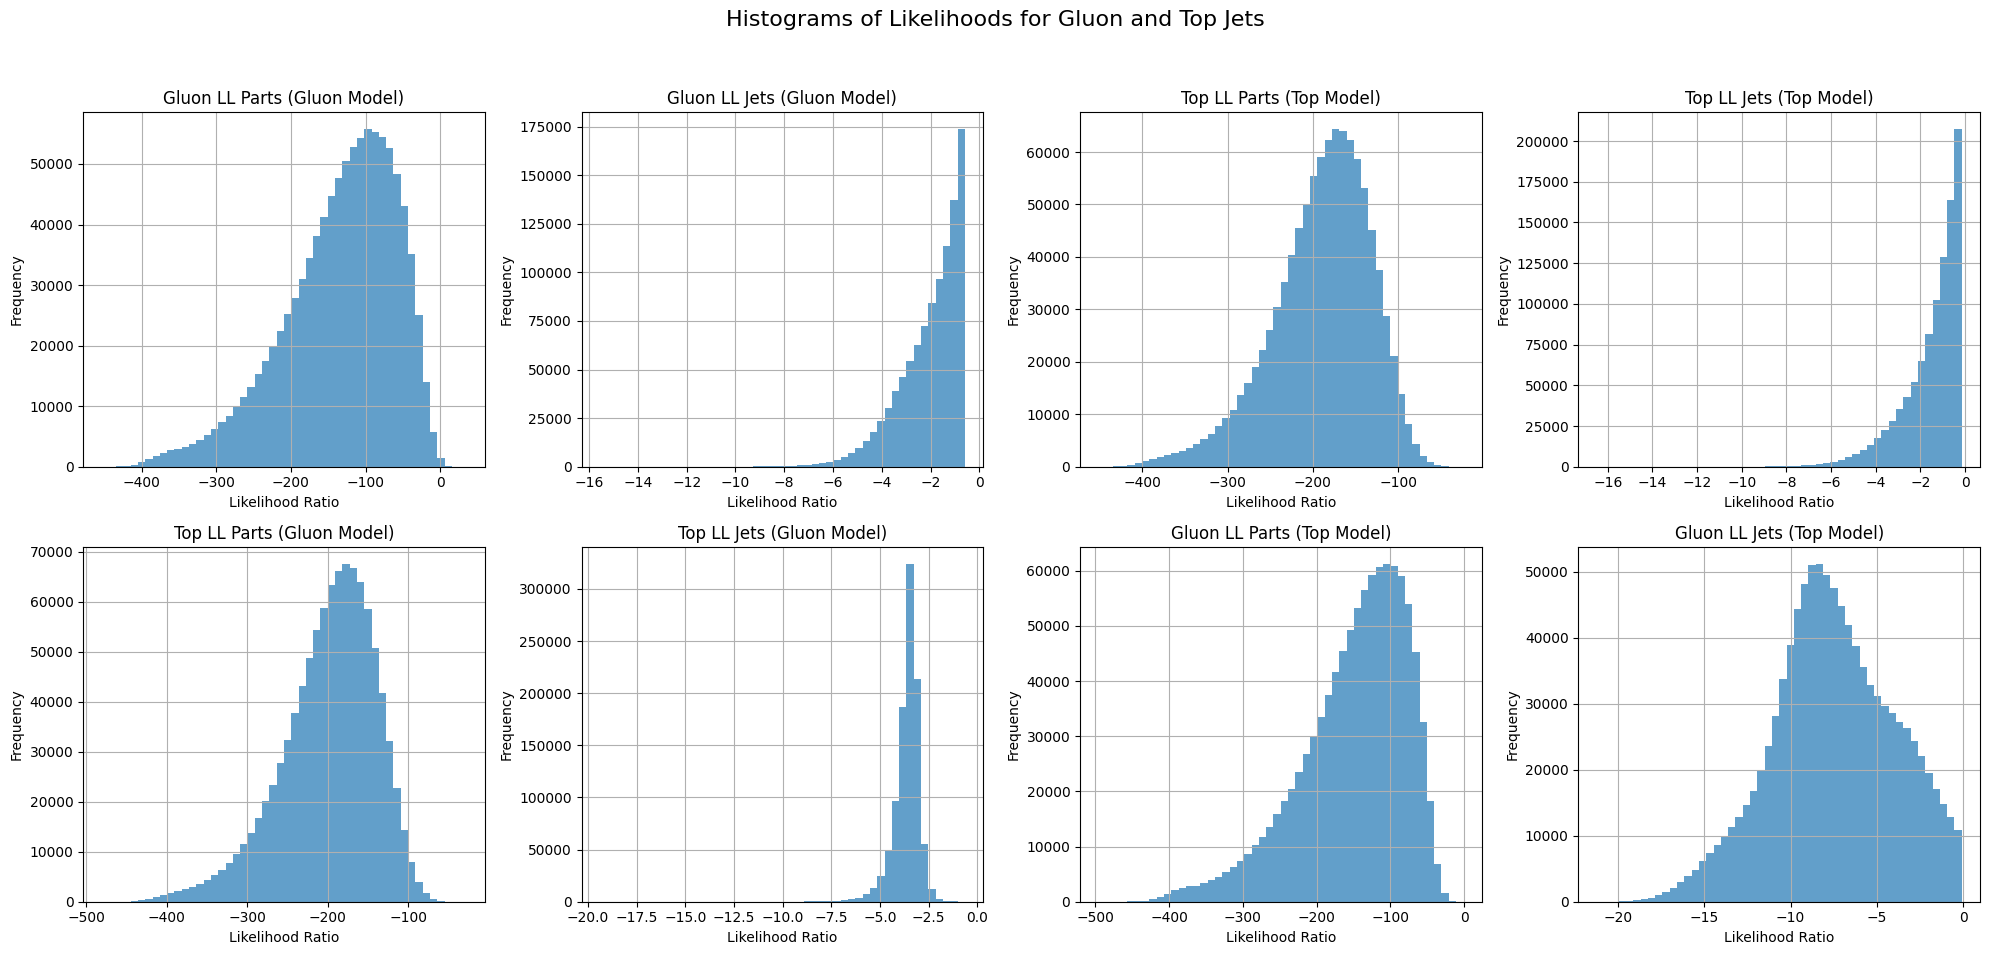

In [3]:
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

# Assuming the datasets have been loaded into variables as previously described

# Setting up the figure for a 2x4 grid of plots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Histograms of Likelihoods for Gluon and Top Jets', fontsize=16)

# Common plot settings
num_bins = 50
alpha_val = 0.7

# Histograms
# Adjust the dataset variables as necessary based on your data loading code
datasets = [
    (gluon_model_gluon_ll_parts, 'Gluon LL Parts (Gluon Model)'),
    (gluon_model_gluon_ll_jets, 'Gluon LL Jets (Gluon Model)'),
    (top_model_top_ll_parts, 'Top LL Parts (Top Model)'),
    (top_model_top_ll_jets, 'Top LL Jets (Top Model)'),
    (top_model_gluon_ll_parts, 'Top LL Parts (Gluon Model)'),
    (top_model_gluon_ll_jets, 'Top LL Jets (Gluon Model)'),
    (gluon_model_top_ll_parts, 'Gluon LL Parts (Top Model)'),
    (gluon_model_top_ll_jets, 'Gluon LL Jets (Top Model)')
]

# Plot each histogram
for ax, (data, title) in zip(axs.flat, datasets):
    ax.hist(data, bins=num_bins, alpha=alpha_val)
    ax.set_title(title)
    ax.set_xlabel('Likelihood Ratio')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout to not overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()


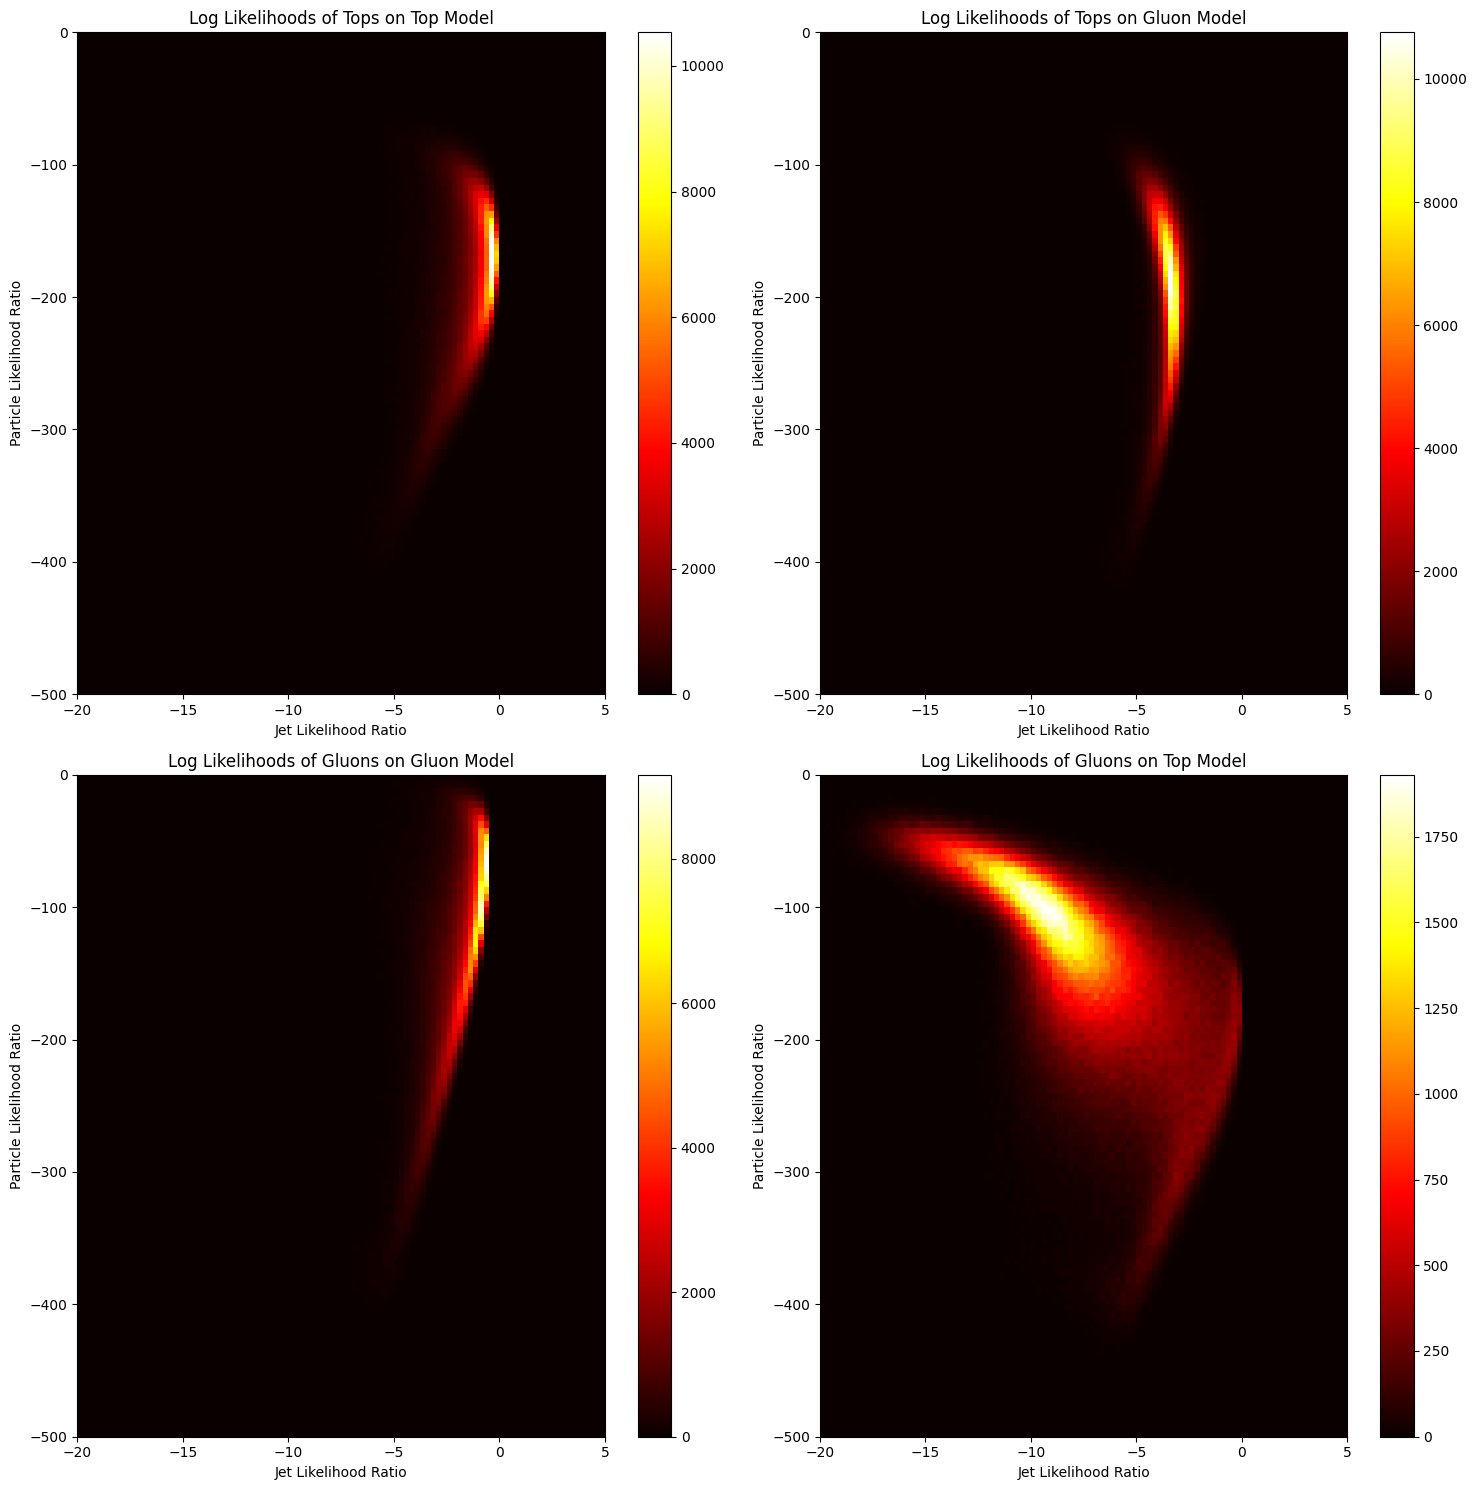

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

# Load your data from the h5 files here
# Replace the following lines with your actual data loading code
# top_model_top_ll_jets, top_model_top_ll_parts, etc.

# Define a function to create heatmap data from the likelihood ratios
def create_heatmap_data(data_x, data_y, num_bins=100, range=None):
    heatmap_data, x_edges, y_edges = np.histogram2d(data_x, data_y, bins=num_bins, range=range)
    return heatmap_data.T, x_edges, y_edges

# Create heatmaps
fig, axs = plt.subplots(2, 2, figsize=(15, 15))  # Adjust the size as needed

# Define titles and data for the subplots
heatmap_infos = [
    ('Log Likelihoods of Tops on Top Model', top_model_top_ll_jets, top_model_top_ll_parts),
    ('Log Likelihoods of Tops on Gluon Model', top_model_gluon_ll_jets, top_model_gluon_ll_parts),
    ('Log Likelihoods of Gluons on Gluon Model', gluon_model_gluon_ll_jets, gluon_model_gluon_ll_parts),
    ('Log Likelihoods of Gluons on Top Model', gluon_model_top_ll_jets, gluon_model_top_ll_parts),
]

# Generate each heatmap
for ax, (title, data_x, data_y) in zip(axs.flatten(), heatmap_infos):
    # Specify the range if you want to limit the axis values
    data_range = [[-20, 5], [-500, 0]]  # Change this to your desired ranges
    heatmap, xedges, yedges = create_heatmap_data(data_x, data_y, range=data_range)
    
    # Plotting the heatmap
    cax = ax.pcolormesh(xedges, yedges, heatmap, shading='auto', cmap='hot')
    fig.colorbar(cax, ax=ax)  # Add a colorbar to the heatmap
    ax.set_title(title)
    ax.set_xlabel('Jet Likelihood Ratio')
    ax.set_ylabel('Particle Likelihood Ratio')

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('heatmap.pdf', bbox_inches='tight')

In [5]:
llr_gluon = gluon_model_top_ll_jets + gluon_model_top_ll_parts - gluon_model_gluon_ll_jets  - gluon_model_gluon_ll_parts

llr_top = top_model_top_ll_jets + top_model_top_ll_parts - top_model_gluon_ll_jets - top_model_gluon_ll_parts

llr = np.concatenate([llr_top, llr_gluon], 0)
labels = np.concatenate([np.ones(llr_top.shape[0]), np.zeros(llr_gluon.shape[0])], 0)

Classifier AUC: 0.9830810216424999


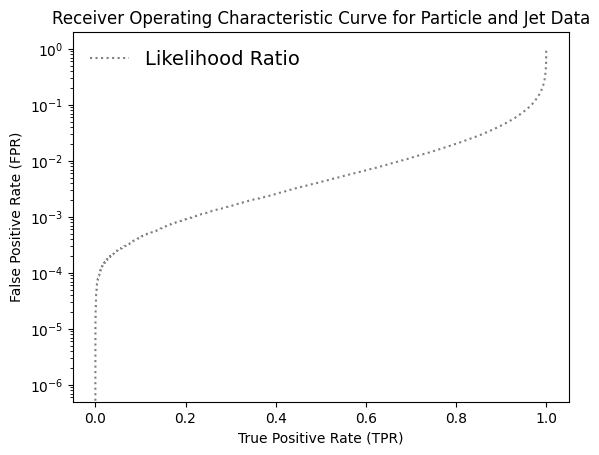

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr, tpr, _ = roc_curve(labels,llr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr, tpr)))
plt.plot(tpr,fpr,label="Likelihood Ratio",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Particle and Jet Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

Classifier AUC: 0.9540859123275


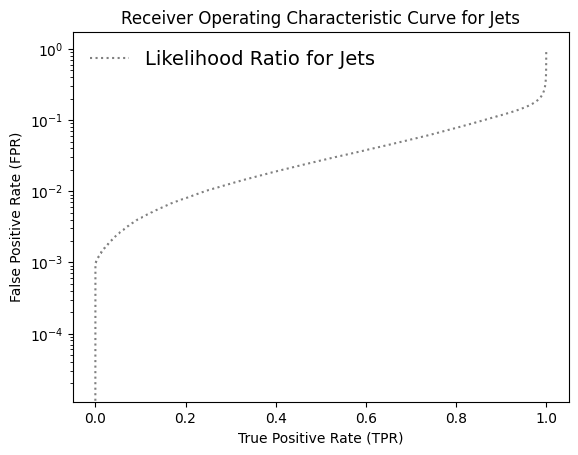

In [7]:
llr_gluon_jets = gluon_model_top_ll_jets - gluon_model_gluon_ll_jets

llr_top_jets = top_model_top_ll_jets - top_model_gluon_ll_jets

llr_jets = np.concatenate([llr_top_jets, llr_gluon_jets], 0)
labels_jets = np.concatenate([np.ones(llr_top_jets.shape[0]), np.zeros(llr_gluon_jets.shape[0])], 0)

fpr_ll_jets, tpr_ll_jets, _ = roc_curve(labels_jets,llr_jets, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_ll_jets, tpr_ll_jets)))
plt.plot(tpr_ll_jets,fpr_ll_jets,label="Likelihood Ratio for Jets",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Jets')
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

Classifier AUC: 0.9674610216035


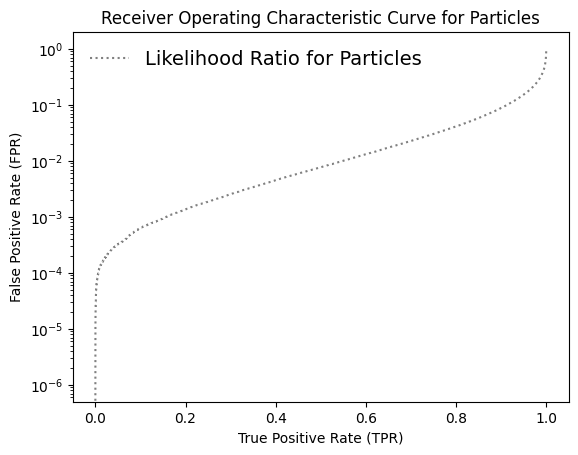

In [8]:
llr_gluon_parts = gluon_model_top_ll_parts - gluon_model_gluon_ll_parts

llr_top_parts = top_model_top_ll_parts - top_model_gluon_ll_parts

llr_parts = np.concatenate([llr_top_parts, llr_gluon_parts], 0)
labels_parts_llr = np.concatenate([np.ones(llr_top_parts.shape[0]), np.zeros(llr_gluon_parts.shape[0])], 0)

fpr_parts_ll, tpr_parts_ll, _ = roc_curve(labels_parts_llr,llr_parts, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_parts_ll, tpr_parts_ll)))
plt.plot(tpr_parts_ll,fpr_parts_ll,label="Likelihood Ratio for Particles",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Particles')
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

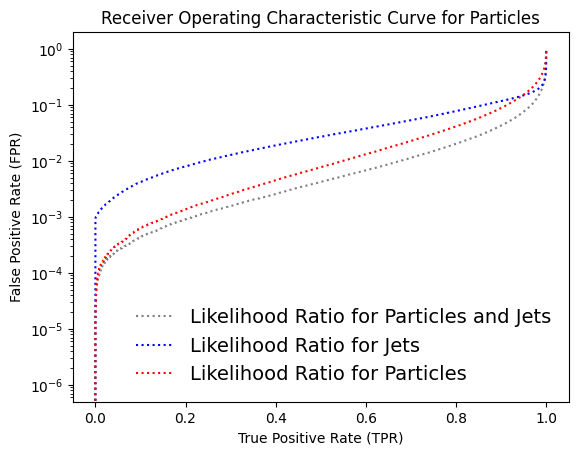

In [9]:
plt.plot(tpr,fpr,label="Likelihood Ratio for Particles and Jets",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_ll_jets,fpr_ll_jets,label="Likelihood Ratio for Jets",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_parts_ll,fpr_parts_ll,label="Likelihood Ratio for Particles",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Particles')
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

### PARTICLES

In [2]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dense, Input, TimeDistributed

# Define the model architecture as described
def DeepSetsAttClass(num_feat, num_heads=4, num_transformer=4, projection_dim=32):
    inputs = Input((None, num_feat))
    masked_inputs = layers.Masking(mask_value=0.0, name='Mask')(inputs)

    masked_features = TimeDistributed(Dense(projection_dim, activation=None))(masked_inputs)
    
    tdd = TimeDistributed(Dense(projection_dim, activation=None))(masked_features)
    tdd = TimeDistributed(layers.LeakyReLU(alpha=0.01))(tdd)
    encoded_patches = TimeDistributed(Dense(projection_dim))(tdd)

    for _ in range(num_transformer):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim//num_heads, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)                
        x3 = layers.Dense(4*projection_dim, activation="gelu")(x3)
        x3 = layers.Dense(projection_dim, activation="gelu")(x3)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    pooled = layers.GlobalAvgPool1D()(representation)
    representation = Dense(2*projection_dim, activation=None)(pooled)
    representation = layers.Dropout(0.1)(representation)
    representation = layers.LeakyReLU(alpha=0.01)(representation)
    
    outputs = Dense(1, activation='sigmoid')(representation)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [10]:
# Instantiate the model
num_feat = 3  # Based on your dataset
model = DeepSetsAttClass(num_feat=num_feat)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to see the architecture
model.summary()

2024-04-10 23:31:23.445458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 23:31:25.765947: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-10 23:31:25.770255: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-10 23:31:25.771736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 3)]    0           []                               
                                                                                                  
 Mask (Masking)                 (None, None, 3)      0           ['input_1[0][0]']                
                                                                                                  
 time_distributed (TimeDistribu  (None, None, 32)    128         ['Mask[0][0]']                   
 ted)                                                                                             
                                                                                                  
 time_distributed_1 (TimeDistri  (None, None, 32)    1056        ['time_distributed[0][0]']   

In [11]:
#whiten data
import numpy as np
gen_gluon_parts_portion = gen_gluon_parts[:1000000,:,:]
gen_top_parts_portion = gen_top_parts[:1000000,:,:]
# Combine the datasets temporarily for calculating mean and std dev
temp_combined_dataset = np.concatenate([gen_gluon_parts[:1000000,:,:], gen_top_parts[:1000000,:,:]], axis=0)

# Calculate mean and std dev for each feature across all particles and events
means = np.mean(temp_combined_dataset, axis=(0, 1), keepdims=True)
std_devs = np.std(temp_combined_dataset, axis=(0, 1), keepdims=True)

# Standardize each dataset
gen_gluon_parts_standardized = (gen_gluon_parts_portion - means) / std_devs
gen_top_parts_standardized = (gen_top_parts_portion - means) / std_devs

# Now you can concatenate the standardized datasets as before
X = np.concatenate([gen_gluon_parts_standardized, gen_top_parts_standardized], axis=0)

# Create labels as before
Y = np.concatenate([np.zeros(1000000), np.ones(1000000)])


In [11]:
print(X.shape)

(2000000, 100, 3)


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Logs when the training is stopped
    mode='min',          # The monitoring metric should be minimized
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

model_checkpoint = ModelCheckpoint(
    'model_gen_parts.h5',  # Saves the weights with the epoch number
    save_weights_only=True,                  # If set to False, the full model is saved
    period=5,                                # Save the weights every 5 epochs
    verbose=1                                # Output a message for each save
)

# Assuming 'model' is your TensorFlow/Keras model that has already been compiled
# Now, fit the model to the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=128, 
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# Optional: Save the model for future use
model.save('model_gen_parts.h5')

Epoch 1/128


2024-04-09 16:23:24.213016: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


50000/50000 [==============================] - 356s 7ms/step - loss: 0.2154 - accuracy: 0.9111 - val_loss: 0.2056 - val_accuracy: 0.9144
Epoch 2/128
50000/50000 [==============================] - 344s 7ms/step - loss: 0.1982 - accuracy: 0.9187 - val_loss: 0.1937 - val_accuracy: 0.9206
Epoch 3/128
50000/50000 [==============================] - 344s 7ms/step - loss: 0.1937 - accuracy: 0.9207 - val_loss: 0.1903 - val_accuracy: 0.9224
Epoch 4/128
50000/50000 [==============================] - 348s 7ms/step - loss: 0.1907 - accuracy: 0.9222 - val_loss: 0.1873 - val_accuracy: 0.9231
Epoch 5/128
49998/50000 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9231
Epoch 5: saving model to model_gen_parts.h5
50000/50000 [==============================] - 346s 7ms/step - loss: 0.1885 - accuracy: 0.9231 - val_loss: 0.1897 - val_accuracy: 0.9217
Epoch 6/128
50000/50000 [==============================] - 341s 7ms/step - loss: 0.1871 - accuracy: 0.9238 - val_loss: 0.1834 - val_ac

In [13]:
model.load_weights('model_gen_parts.h5')

In [14]:
import numpy as np
gen_gluon_parts_test = gen_gluon_parts[1000000:,:,:]
gen_top_parts_test = gen_top_parts[1000000:,:,:]
# Combine the datasets temporarily for calculating mean and std dev
temp_combined_dataset_test = np.concatenate([gen_gluon_parts[1000000:,:,:], gen_top_parts[1000000:,:,:]], axis=0)

# Calculate mean and std dev for each feature across all particles and events
means_test = np.mean(temp_combined_dataset_test, axis=(0, 1), keepdims=True)
std_devs_test = np.std(temp_combined_dataset_test, axis=(0, 1), keepdims=True)

# Standardize each dataset
gen_gluon_parts_standardized_test = (gen_gluon_parts_test - means_test) / std_devs_test
gen_top_parts_standardized_test = (gen_top_parts_test - means_test) / std_devs_test

# Now you can concatenate the standardized datasets as before
X_gen_part_test = np.concatenate([gen_gluon_parts_standardized_test, gen_top_parts_standardized_test], axis=0)

# Create labels as before
Y_gen_part_test = np.concatenate([np.zeros(600000), np.ones(600000)])


In [15]:
predictions = model.predict(X_gen_part_test)

2024-04-09 22:30:02.461650: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


37500/37500 [==============================] - 93s 2ms/step


Classifier AUC: 0.9694199848888888


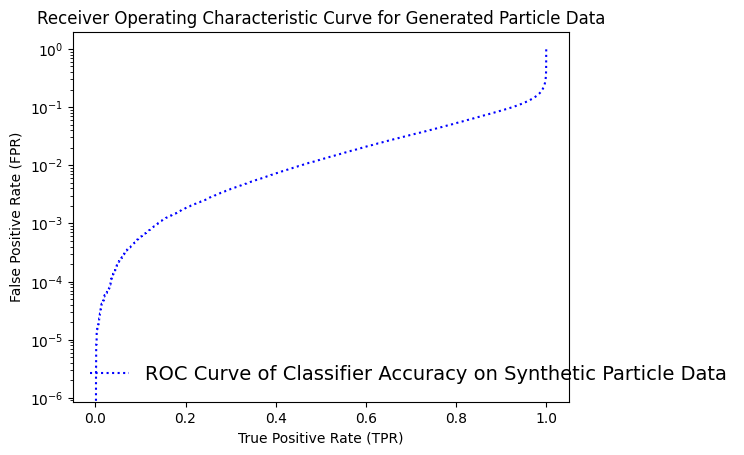

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils

fpr_parts, tpr_parts, _ = roc_curve(Y_gen_part_test,predictions, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_parts, tpr_parts)))
plt.plot(tpr_parts,fpr_parts,label="ROC Curve of Classifier Accuracy on Synthetic Particle Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

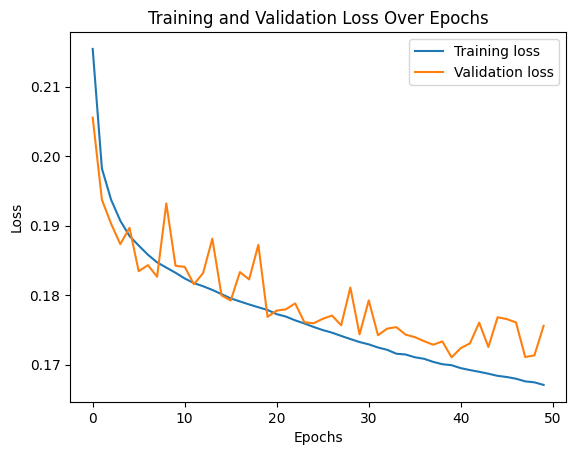

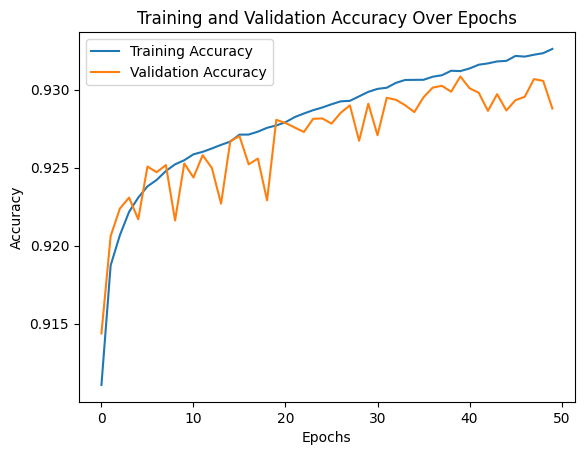

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Similarly, for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#using transformer model architecture to determine the classifier performance on the real particle data
import utils
import h5py as h5
import numpy as np
num_feat_new = 3  # Based on your dataset
model_parts_real = DeepSetsAttClass(num_feat=num_feat_new)

# Compile the model
model_parts_real.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


filepaths = [
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_train.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_train.h5'
]

with h5.File(filepaths[0], "r") as h5f:
    real_gluon_parts = h5f['data'][()].astype(np.float32)
    real_gluon_jets = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[1], "r") as h5f:
    real_top_parts = h5f['data'][()].astype(np.float32)
    real_top_jets = h5f['jet'][()].astype(np.float32)
real_gluon_parts_train = real_gluon_parts[:300000, :, :]
real_gluon_jets_train = real_gluon_jets[:300000, :]
real_top_parts_train = real_top_parts[:300000, :, :]
real_top_jets_train = real_top_jets[:300000, :]


In [13]:
#whiten data
import numpy as np

# Combine the datasets temporarily for calculating mean and std dev
temp_combined_dataset_2 = np.concatenate([real_gluon_parts_train, real_top_parts_train], axis=0)

# Calculate mean and std dev for each feature across all particles and events
means_2 = np.mean(temp_combined_dataset_2, axis=(0, 1), keepdims=True)
std_devs_2 = np.std(temp_combined_dataset_2, axis=(0, 1), keepdims=True)

# Standardize each dataset
gen_gluon_parts_standardized_2 = (real_gluon_parts_train - means_2) / std_devs_2
gen_top_parts_standardized_2 = (real_top_parts_train - means_2) / std_devs_2

# Now you can concatenate the standardized datasets as before
X_real_parts = np.concatenate([gen_gluon_parts_standardized_2, gen_top_parts_standardized_2], axis=0)

# Create labels as before
Y_real_parts = np.concatenate([np.zeros(300000), np.ones(300000)])


In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_real_parts, Y_real_parts, test_size=0.2, random_state=42)


early_stopping_real_parts = EarlyStopping(
    monitor='val_loss',  # Monitors the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Logs when the training is stopped
    mode='min',          # The monitoring metric should be minimized
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

model_checkpoint_parts_real = ModelCheckpoint(
    'model_real_particles.h5',  # Saves the weights with the epoch number
    save_weights_only=True,                  # If set to False, the full model is saved
    period=5,                                # Save the weights every 5 epochs
    verbose=1                                # Output a message for each save
)

history_real_parts = model_parts_real.fit(
    X_train_2, y_train_2,
    validation_data=(X_val_2, y_val_2),
    epochs=128,
    batch_size=32,
    callbacks = [early_stopping_real_parts, model_checkpoint_parts_real]
)

model_parts_real.save('model_real_particles.h5')

Epoch 1/128
15000/15000 [==============================] - 108s 7ms/step - loss: 0.2220 - accuracy: 0.9085 - val_loss: 0.1859 - val_accuracy: 0.9245
Epoch 2/128
15000/15000 [==============================] - 105s 7ms/step - loss: 0.1948 - accuracy: 0.9204 - val_loss: 0.1869 - val_accuracy: 0.9242
Epoch 3/128
15000/15000 [==============================] - 106s 7ms/step - loss: 0.1891 - accuracy: 0.9233 - val_loss: 0.1850 - val_accuracy: 0.9245
Epoch 4/128
15000/15000 [==============================] - 106s 7ms/step - loss: 0.1856 - accuracy: 0.9247 - val_loss: 0.1857 - val_accuracy: 0.9244
Epoch 5/128
15000/15000 [==============================] - ETA: 0s - loss: 0.1831 - accuracy: 0.9260
Epoch 5: saving model to model_real_particles.h5
15000/15000 [==============================] - 103s 7ms/step - loss: 0.1831 - accuracy: 0.9260 - val_loss: 0.1755 - val_accuracy: 0.9284
Epoch 6/128
15000/15000 [==============================] - 104s 7ms/step - loss: 0.1815 - accuracy: 0.9268 - val_loss

In [19]:
model_parts_real.load_weights('model_real_particles.h5')

In [28]:
import numpy as np
real_gluon_parts_test = real_gluon_parts[300000:600000, :]
real_top_parts_test = real_top_parts[300000:600000, :]

# Combine the datasets temporarily for calculating mean and std dev
real_temp_combined_dataset_test = np.concatenate([real_gluon_parts[300000:600000, :], real_top_parts[300000:600000, :]], axis=0)
print(real_temp_combined_dataset_test.shape)
# Calculate mean and std dev for each feature across all particles and events
means_test_real = np.mean(real_temp_combined_dataset_test, axis=(0, 1), keepdims=True)
std_devs_test_real = np.std(real_temp_combined_dataset_test, axis=(0, 1), keepdims=True)

# Standardize each dataset
real_gluon_parts_standardized_test = (real_gluon_parts_test - means_test_real) / std_devs_test_real
real_top_parts_standardized_test = (real_top_parts_test - means_test_real) / std_devs_test_real

# Now you can concatenate the standardized datasets as before
X_real_part_test = np.concatenate([real_gluon_parts_standardized_test, real_top_parts_standardized_test], axis=0)

# Create labels as before
Y_real_part_test = np.concatenate([np.zeros(real_gluon_parts_test.shape[0]), np.ones(real_top_parts_test.shape[0])])

(600000, 100, 3)


In [25]:
print(X_real_part_test.shape)

(1200000, 100, 3)


In [29]:
predictions_2 = model_parts_real.predict(X_real_part_test)

18750/18750 [==============================] - 46s 2ms/step


Classifier AUC: 0.9816064603611112


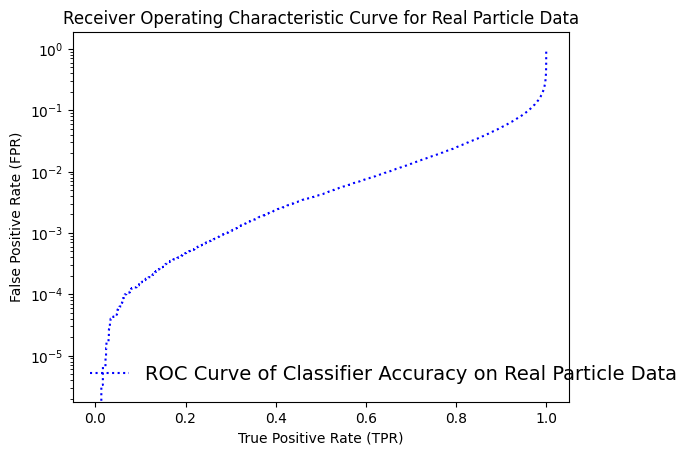

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils

fpr_parts_real, tpr_parts_real, _ = roc_curve(Y_real_part_test,predictions_2, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_parts_real, tpr_parts_real)))
plt.plot(tpr_parts_real,fpr_parts_real,label="ROC Curve of Classifier Accuracy on Real Particle Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

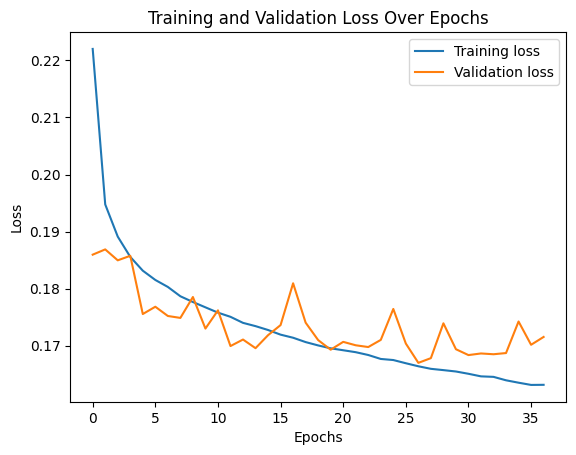

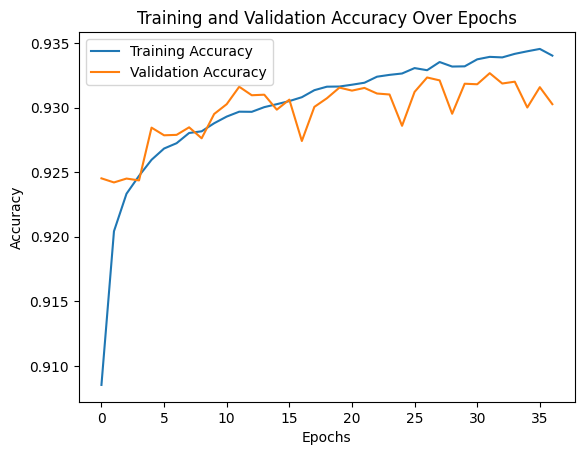

In [21]:
plt.plot(history_real_parts.history['loss'], label='Training loss')
plt.plot(history_real_parts.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Similarly, for accuracy
plt.plot(history_real_parts.history['accuracy'], label='Training Accuracy')
plt.plot(history_real_parts.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

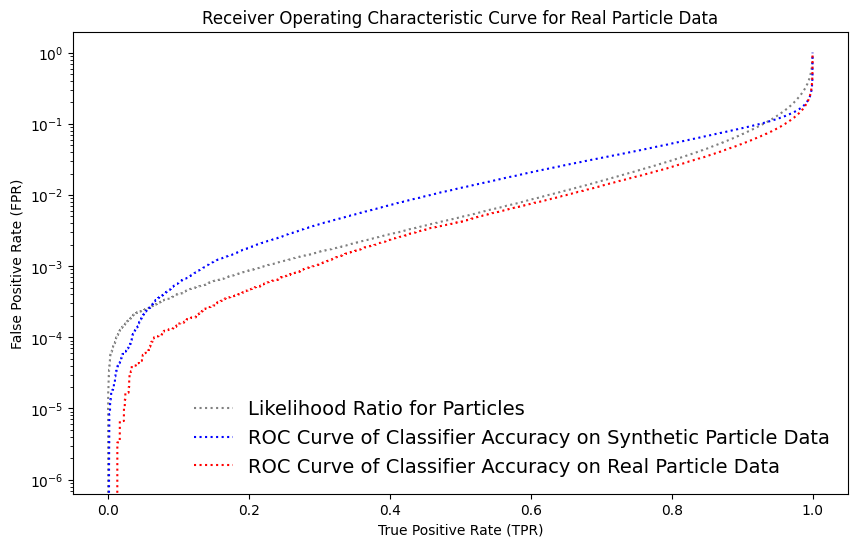

In [33]:
#create combined plots
plt.figure(figsize=(10, 6))
plt.plot(tpr_parts_ll,fpr_parts_ll,label="Likelihood Ratio for Particles",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_parts,fpr_parts,label="ROC Curve of Classifier Accuracy on Synthetic Particle Data",
                         color='blue',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_parts_real,fpr_parts_real,label="ROC Curve of Classifier Accuracy on Real Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

### JETS

In [34]:
#using neural network classifier to determine the performance on original jet data
from sklearn.utils import shuffle
loaded_X = np.concatenate([gen_gluon_jets[:1000000, :], gen_top_jets[:1000000, :]], 0)
loaded_Y = np.concatenate([np.array([0 for i in range(1000000)]), np.array([1 for i in range(1000000)])], 0)
print(loaded_X.shape)
print(loaded_Y.shape)
mean = loaded_X.mean(axis=0)
loaded_X -= mean
std = loaded_X.std(axis=0)
loaded_X /= std
loaded_X, loaded_Y = shuffle(loaded_X, loaded_Y, random_state=0)
print(loaded_X.shape)
print(loaded_Y.shape)

(2000000, 2)
(2000000,)
(2000000, 2)
(2000000,)


In [35]:
#CLASSIFIER for original data
#input gluon and top jets and then input the actual labels to train the loss function with 3 or so layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_gen_jet = Sequential()
model_gen_jet.add(Dense(50, input_dim = len(gen_gluon_jets[0, :]), activation = 'relu'))
model_gen_jet.add(Dense(50, activation = 'relu'))
model_gen_jet.add(Dense(1, activation = 'sigmoid'))
model_gen_jet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 50)                150       
                                                                 
 dense_27 (Dense)            (None, 50)                2550      
                                                                 
 dense_28 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_gen_jet.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
from sklearn.model_selection import train_test_split
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(loaded_X, loaded_Y, test_size=0.2, random_state=42)

early_stopping_gen_jets = EarlyStopping(
    monitor='val_loss',  # Monitors the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Logs when the training is stopped
    mode='min',          # The monitoring metric should be minimized
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

model_checkpoint_jets_gen = ModelCheckpoint(
    'model_generated_jets.h5',  # Saves the weights with the epoch number
    save_weights_only=True,                  # If set to False, the full model is saved
    period=5,                                # Save the weights every 5 epochs
    verbose=1                                # Output a message for each save
)


history_gen_jets = model_gen_jet.fit(
    X_train_3, y_train_3,
    validation_data=(X_val_3, y_val_3),
    epochs=128,
    verbose = 1,
    callbacks = [early_stopping_gen_jets, model_checkpoint_jets_gen]
)

#history_real_jets = model_original.fit(x = loaded_X, y = loaded_Y, epochs = 64, verbose = 1)
model_gen_jet.save('model_generated_jets.h5')

Epoch 1/128
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2514 - accuracy: 0.8990 - val_loss: 0.2501 - val_accuracy: 0.8995
Epoch 2/128
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2497 - accuracy: 0.8994 - val_loss: 0.2501 - val_accuracy: 0.8996
Epoch 3/128
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2495 - accuracy: 0.8995 - val_loss: 0.2503 - val_accuracy: 0.8996
Epoch 4/128
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2494 - accuracy: 0.8996 - val_loss: 0.2502 - val_accuracy: 0.8993
Epoch 5/128
49972/50000 [============================>.] - ETA: 0s - loss: 0.2493 - accuracy: 0.8996
Epoch 5: saving model to model_generated_jets.h5
50000/50000 [==============================] - 61s 1ms/step - loss: 0.2493 - accuracy: 0.8996 - val_loss: 0.2499 - val_accuracy: 0.8996
Epoch 6/128
50000/50000 [==============================] - 60s 1ms/step - loss: 0.2493 - accuracy: 0.8995 - val_loss: 0.24

In [37]:
model_gen_jet.load_weights('model_generated_jets.h5')

In [38]:
from sklearn.utils import shuffle
loaded_X_test = np.concatenate([gen_gluon_jets[1000000:, :], gen_top_jets[1000000:, :]], 0)
loaded_Y_test = np.concatenate([np.array([0 for i in range(600000)]), np.array([1 for i in range(600000)])], 0)
print(loaded_X_test.shape)
print(loaded_Y_test.shape)
mean_testing = loaded_X_test.mean(axis=0)
loaded_X_test -= mean_testing
std_testing = loaded_X_test.std(axis=0)
loaded_X_test /= std_testing
loaded_X_test, loaded_Y_test = shuffle(loaded_X_test, loaded_Y_test, random_state=0)
print(loaded_X_test.shape)
print(loaded_Y_test.shape)

(1200000, 2)
(1200000,)
(1200000, 2)
(1200000,)


In [39]:
prediction_original = model_gen_jet.predict(loaded_X_test)
print(prediction_original[:5])

37500/37500 [==============================] - 20s 538us/step
[[1.3821651e-05]
 [9.6002179e-01]
 [4.5683239e-05]
 [8.6803764e-01]
 [1.8599222e-04]]


Classifier AUC: 0.9532214546736111


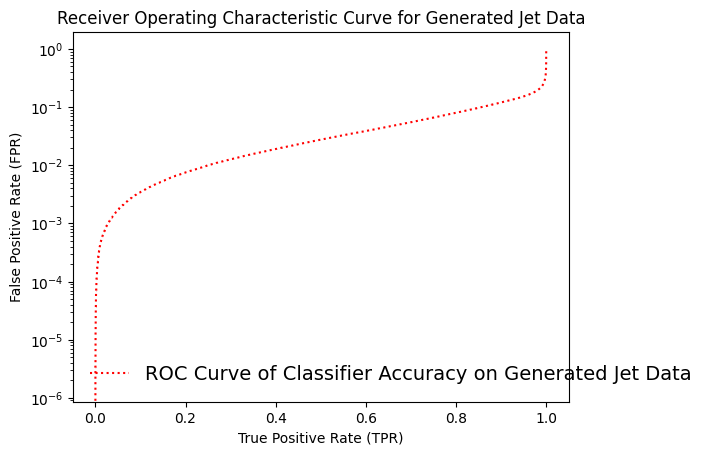

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_orig, tpr_orig, _ = roc_curve(loaded_Y_test,prediction_original, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_orig, tpr_orig)))
plt.plot(tpr_orig,fpr_orig,label="ROC Curve of Classifier Accuracy on Generated Jet Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet Data')  # Plot title

plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

In [ ]:
plt.plot(history_gen_jets.history['loss'], label='Training loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Similarly, for accuracy
plt.plot(history_gen_jets.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
#using neural network classifier to determine the performance on original jet data
import numpy as np
from sklearn.utils import shuffle
loaded_X_2 = np.concatenate([real_gluon_jets[:300000, :], real_top_jets[:300000, :]], 0)
loaded_Y_2 = np.concatenate([np.array([0 for i in range(300000)]), np.array([1 for i in range(300000)])], 0)
print(loaded_X_2.shape)
print(loaded_Y_2.shape)
mean = loaded_X_2.mean(axis=0)
loaded_X_2 -= mean
std = loaded_X_2.std(axis=0)
loaded_X_2 /= std
loaded_X_2, loaded_Y_2 = shuffle(loaded_X_2, loaded_Y_2, random_state=0)
print(loaded_X_2.shape)
print(loaded_Y_2.shape)

(600000, 2)
(600000,)
(600000, 2)
(600000,)


In [44]:
#CLASSIFIER for original data
#input gluon and top jets and then input the actual labels to train the loss function with 3 or so layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_original_real = Sequential()
model_original_real.add(Dense(50, input_dim = len(real_gluon_jets[0, :]), activation = 'relu'))
model_original_real.add(Dense(50, activation = 'relu'))
model_original_real.add(Dense(1, activation = 'sigmoid'))
model_original_real.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 50)                150       
                                                                 
 dense_30 (Dense)            (None, 50)                2550      
                                                                 
 dense_31 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_original_real.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(loaded_X_2, loaded_Y_2, test_size=0.2, random_state=42)

early_stopping_real_jets = EarlyStopping(
    monitor='val_loss',  # Monitors the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Logs when the training is stopped
    mode='min',          # The monitoring metric should be minimized
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

model_checkpoint_jets_real = ModelCheckpoint(
    'model_real_jets.h5',  # Saves the weights with the epoch number
    save_weights_only=True,                  # If set to False, the full model is saved
    period=5,                                # Save the weights every 5 epochs
    verbose=1                                # Output a message for each save
)


history_real_jets = model_original_real.fit(
    X_train_3, y_train_3,
    validation_data=(X_val_3, y_val_3),
    epochs=128,
    verbose = 1,
    callbacks = [early_stopping_real_jets, model_checkpoint_jets_real]
)


#history_real_jets_ACTUAL = model_original_real.fit(x = loaded_X_2, y = loaded_Y_2, epochs = 64, verbose = 1)
model_original_real.save('model_real_jets.h5')

In [47]:
model_original_real.load_weights('model_real_jets.h5')

In [48]:
import numpy as np
from sklearn.utils import shuffle
loaded_X_2 = np.concatenate([real_gluon_jets[300000:600000, :], real_top_jets[300000:600000, :]], 0)
loaded_Y_2 = np.concatenate([np.array([0 for i in range(300000)]), np.array([1 for i in range(300000)])], 0)
print(loaded_X_2.shape)
print(loaded_Y_2.shape)
mean = loaded_X_2.mean(axis=0)
loaded_X_2 -= mean
std = loaded_X_2.std(axis=0)
loaded_X_2 /= std
loaded_X_2, loaded_Y_2 = shuffle(loaded_X_2, loaded_Y_2, random_state=0)
print(loaded_X_2.shape)
print(loaded_Y_2.shape)

(600000, 2)
(600000,)
(600000, 2)
(600000,)


In [49]:
prediction_original_real = model_original_real.predict(loaded_X_2)
print(prediction_original_real[:5])

18750/18750 [==============================] - 10s 555us/step
[[1.3387929e-09]
 [6.7238703e-02]
 [4.2811334e-01]
 [5.0417136e-12]
 [5.3510712e-06]]


Classifier AUC: 0.9526242211444446


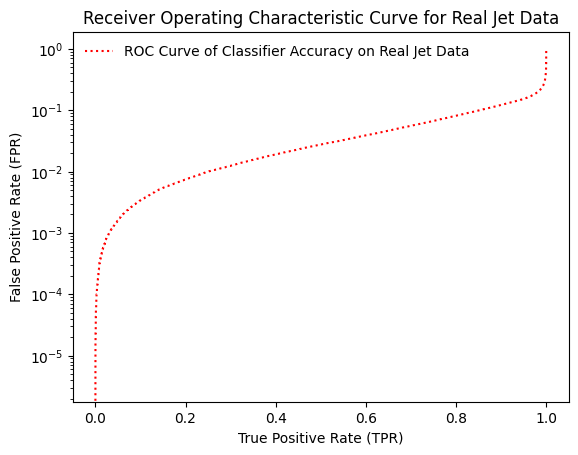

In [50]:
fpr_orig_real, tpr_orig_real, _ = roc_curve(loaded_Y_2,prediction_original_real, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_orig_real, tpr_orig_real)))
plt.plot(tpr_orig_real,fpr_orig_real,label="ROC Curve of Classifier Accuracy on Real Jet Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

In [ ]:
plt.plot(history_real_jets.history['loss'], label='Training loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Similarly, for accuracy
plt.plot(history_real_jets.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

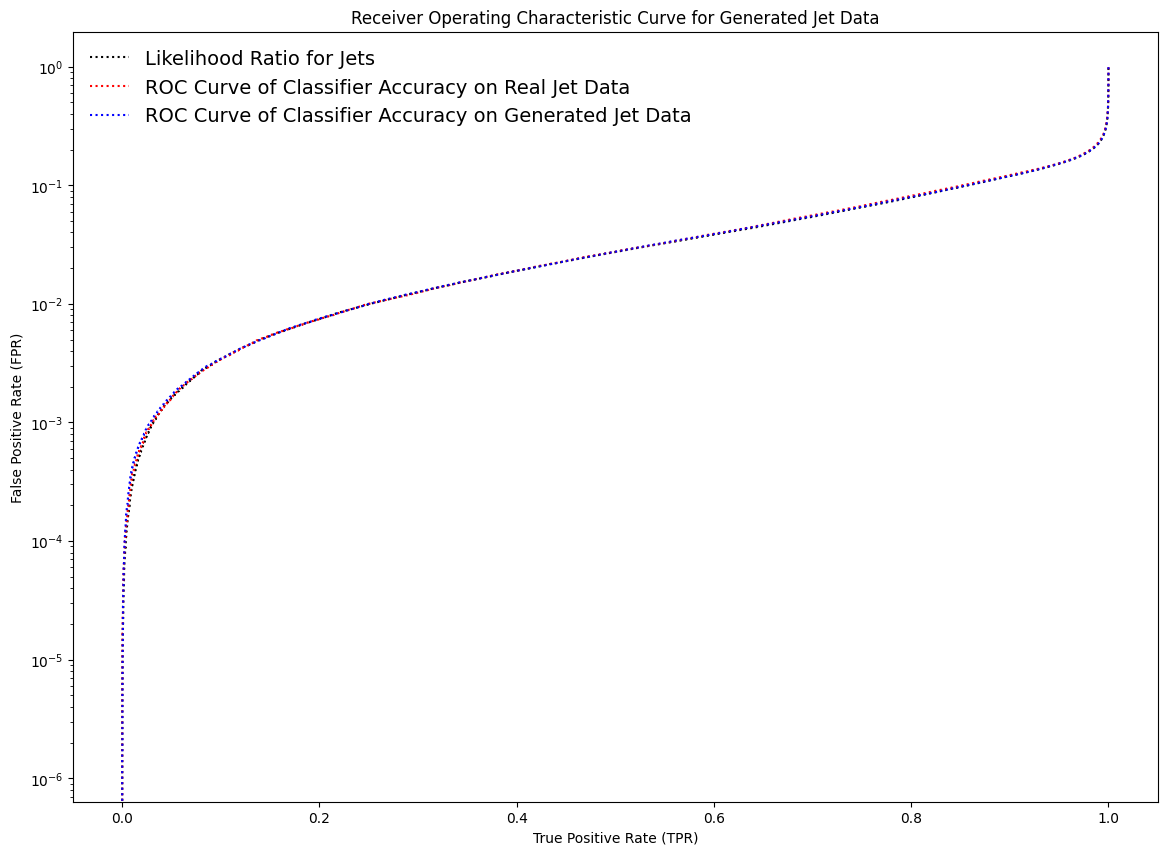

In [51]:
#create plots
plt.figure(figsize=(14, 10))  # Larger figure size
plt.plot(tpr_ll_jets,fpr_ll_jets,label="Likelihood Ratio for Jets",
                         color='black', linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_orig_real,fpr_orig_real,label="ROC Curve of Classifier Accuracy on Real Jet Data",
                         color='red', linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr_orig,fpr_orig,label="ROC Curve of Classifier Accuracy on Generated Jet Data",
                         color='blue', linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet Data')  # Plot title

plt.yscale('log')
plt.legend(frameon=False,fontsize=14)
plt.show()

### COMBINED

In [10]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dense, Input, TimeDistributed


import numpy as np
import h5py as h5

filepaths = [
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_model_gluon_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_model_top_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_model_top_ll.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_model_gluon_ll.h5'
]

gluon_parts = []
gluon_jets = []
gen_gluon_parts = []
gen_gluon_jets = []
with h5.File(filepaths[0], "r") as h5f:
    gen_gluon_parts = h5f['data'][()].astype(np.float32)
    gen_gluon_jets = h5f['jet'][()].astype(np.float32)
    gluon_parts = h5f['normal_data'][()].astype(np.float32)
    gluon_jets = h5f['normal_jet'][()].astype(np.float32)
with h5.File(filepaths[1], "r") as h5f:
    gen_top_parts = h5f['data'][()].astype(np.float32)
    gen_top_jets = h5f['jet'][()].astype(np.float32)
    top_parts = h5f['normal_data'][()].astype(np.float32)
    top_jets = h5f['normal_jet'][()].astype(np.float32)
# with h5.File(filepaths[2], "r") as h5f:
#     gen_gluon_parts_gluon_model_ll = h5f['ll_data'][()].astype(np.float32)
#     gen_gluon_jets_gluon_model_ll = h5f['ll_jet'][()].astype(np.float32)
#     _ = h5f['normal_data'][()].astype(np.float32)
#     _ = h5f['normal_jet'][()].astype(np.float32)
# with h5.File(filepaths[3], "r") as h5f:
#     gen_top_parts_top_model_ll = h5f['ll_data'][()].astype(np.float32)
#     gen_top_jets_top_model_ll = h5f['ll_jet'][()].astype(np.float32)
#     _ = h5f['normal_data'][()].astype(np.float32)
#     _ = h5f['normal_jet'][()].astype(np.float32)

print(gen_gluon_parts.shape)
print(gen_gluon_jets.shape)
print(gluon_parts.shape)
print(gluon_jets.shape)
print(gen_top_parts.shape)
print(gen_top_jets.shape)
print(top_parts.shape)
print(top_jets.shape)

# with h5.File(filepaths[2], "r") as h5f:
#     gluon_model_gluon_ll_parts = h5f['ll_data'][()].astype(np.float32)
#     gluon_model_gluon_ll_jets = h5f['ll_jet'][()].astype(np.float32)
# with h5.File(filepaths[3], "r") as h5f:
#     top_model_top_ll_parts = h5f['ll_data'][()].astype(np.float32)
#     top_model_top_ll_jets = h5f['ll_jet'][()].astype(np.float32)
# with h5.File(filepaths[4], "r") as h5f:
#     gluon_model_top_ll_parts = h5f['ll_data'][()].astype(np.float32)
#     gluon_model_top_ll_jets = h5f['ll_jet'][()].astype(np.float32)
# with h5.File(filepaths[5], "r") as h5f:
#     top_model_gluon_ll_parts = h5f['ll_data'][()].astype(np.float32)
#     top_model_gluon_ll_jets = h5f['ll_jet'][()].astype(np.float32)



# Define the model architecture as described
def DeepSetsAttClass(num_feat, num_heads=4, num_transformer=4, projection_dim=32):
    inputs = Input((None, num_feat))
    masked_inputs = layers.Masking(mask_value=0.0, name='Mask')(inputs)

    masked_features = TimeDistributed(Dense(projection_dim, activation=None))(masked_inputs)
    
    tdd = TimeDistributed(Dense(projection_dim, activation=None))(masked_features)
    tdd = TimeDistributed(layers.LeakyReLU(alpha=0.01))(tdd)
    encoded_patches = TimeDistributed(Dense(projection_dim))(tdd)

    for _ in range(num_transformer):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim//num_heads, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)                
        x3 = layers.Dense(4*projection_dim, activation="gelu")(x3)
        x3 = layers.Dense(projection_dim, activation="gelu")(x3)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    pooled = layers.GlobalAvgPool1D()(representation)
    representation = Dense(2*projection_dim, activation=None)(pooled)
    representation = layers.Dropout(0.1)(representation)
    representation = layers.LeakyReLU(alpha=0.01)(representation)
    
    outputs = Dense(1, activation='sigmoid')(representation)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model


(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)
(1000000, 100, 3)
(1000000, 2)


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def combine_features(particles, jets):
    # Create a mask for non-padded particles
    mask = np.any(particles != 0, axis=-1, keepdims=True)
    # Repeat jet features to match the particles shape
    jets_expanded = np.repeat(jets[:, np.newaxis, :], particles.shape[1], axis=1)
    # Use the mask to zero out jet features where particles are padded
    jets_masked = jets_expanded * mask
    # Concatenate the particle features and the masked jet features
    combined = np.concatenate([particles, jets_masked], axis=-1)
    return combined


# Combine your datasets
gen_gluon_combined = combine_features(gen_gluon_parts, gen_gluon_jets)
gen_top_combined = combine_features(gen_top_parts, gen_top_jets)

# Create labels
labels_gluon = np.zeros((gen_gluon_combined.shape[0], 1))
labels_top = np.ones((gen_top_combined.shape[0], 1))

# Splitting data for training and testing
X = np.concatenate([gen_gluon_combined[:600000], gen_top_combined[:600000]])
y = np.concatenate([labels_gluon[:600000], labels_top[:600000]])

# For test data
X_test = np.concatenate([gen_gluon_combined[600000:], gen_top_combined[600000:]])
y_test = np.concatenate([labels_gluon[600000:], labels_top[600000:]])

# Whitening (Standardization)
scaler = StandardScaler()
# Flatten the data to apply standard scaling
X_flattened = X.reshape(X.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

X_scaled = scaler.fit_transform(X_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Reshape back to original shape after scaling
X_scaled = X_scaled.reshape(X.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=0)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-04-24 14:02:41.134906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 14:02:43.656346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38354 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-24 14:02:43.666665: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38354 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-24 14:02:43.668755: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [5]:
import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/0transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_0transformer.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/128


2024-04-24 14:02:50.339017: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 58s 2ms/step - loss: 0.2461 - accuracy: 0.9009 - val_loss: 0.2407 - val_accuracy: 0.9031
Epoch 2/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2405 - accuracy: 0.9026 - val_loss: 0.2403 - val_accuracy: 0.9033
Epoch 3/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2390 - accuracy: 0.9029 - val_loss: 0.2410 - val_accuracy: 0.9041
Epoch 4/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2344 - accuracy: 0.9044 - val_loss: 0.2299 - val_accuracy: 0.9060
Epoch 5/128
29987/30000 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9073
Epoch 5: saving model to cg_transformers_checkpoints/0transformer_checkpoint_05.h5
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2268 - accuracy: 0.9073 - val_loss: 0.2211 - val_accuracy: 0.9098
Epoch 6/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2177 - accuracy: 0

In [6]:
model_cg.save('0transformer_combined_gen.h5')

In [7]:
model_cg.load_weights('0transformer_combined_gen.h5')

In [8]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 18s 725us/step


Classifier AUC: 0.974529311359375


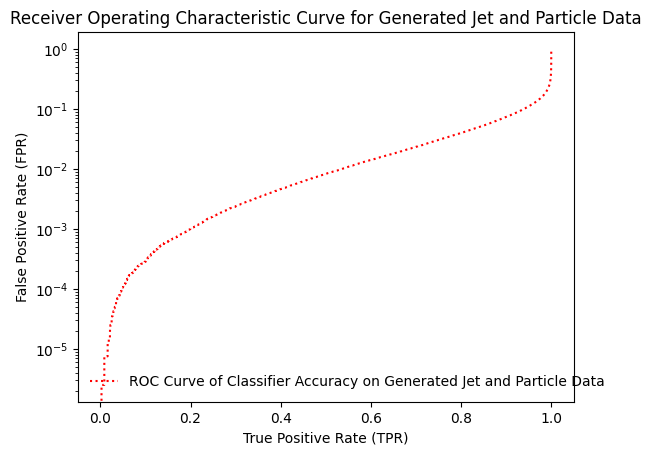

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 1 transformer

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=1)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/1transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_1transformer.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/128
30000/30000 [==============================] - 100s 3ms/step - loss: 0.2273 - accuracy: 0.9070 - val_loss: 0.2061 - val_accuracy: 0.9153
Epoch 2/128
30000/30000 [==============================] - 98s 3ms/step - loss: 0.2010 - accuracy: 0.9180 - val_loss: 0.1953 - val_accuracy: 0.9202
Epoch 3/128
30000/30000 [==============================] - 95s 3ms/step - loss: 0.1967 - accuracy: 0.9199 - val_loss: 0.1910 - val_accuracy: 0.9223
Epoch 4/128
30000/30000 [==============================] - 95s 3ms/step - loss: 0.1945 - accuracy: 0.9207 - val_loss: 0.2026 - val_accuracy: 0.9165
Epoch 5/128
29986/30000 [============================>.] - ETA: 0s - loss: 0.1928 - accuracy: 0.9214
Epoch 5: saving model to cg_transformers_checkpoints/1transformer_checkpoint_05.h5
30000/30000 [==============================] - 92s 3ms/step - loss: 0.1928 - accuracy: 0.9214 - val_loss: 0.1918 - val_accuracy: 0.9219
Epoch 6/128
30000/30000 [==============================] - 91s 3ms/step - loss: 0.1916 

In [11]:
model_cg.save('1transformer_combined_gen.h5')

In [12]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 29s 1ms/step


Classifier AUC: 0.977574342796875


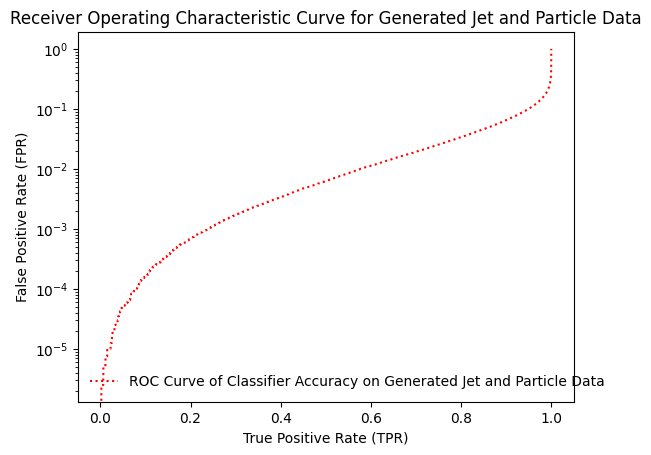

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 2 transformer

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=2)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/2transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_2transformer.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/128
30000/30000 [==============================] - 144s 5ms/step - loss: 0.2175 - accuracy: 0.9114 - val_loss: 0.2023 - val_accuracy: 0.9175
Epoch 2/128
30000/30000 [==============================] - 140s 5ms/step - loss: 0.1973 - accuracy: 0.9197 - val_loss: 0.1935 - val_accuracy: 0.9208
Epoch 3/128
30000/30000 [==============================] - 133s 4ms/step - loss: 0.1942 - accuracy: 0.9211 - val_loss: 0.1919 - val_accuracy: 0.9223
Epoch 4/128
30000/30000 [==============================] - 133s 4ms/step - loss: 0.1921 - accuracy: 0.9218 - val_loss: 0.1891 - val_accuracy: 0.9231
Epoch 5/128
29993/30000 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9224
Epoch 5: saving model to cg_transformers_checkpoints/2transformer_checkpoint_05.h5
30000/30000 [==============================] - 132s 4ms/step - loss: 0.1906 - accuracy: 0.9224 - val_loss: 0.1891 - val_accuracy: 0.9237
Epoch 6/128
30000/30000 [==============================] - 135s 4ms/step - loss: 0.

In [15]:
model_cg.save('2transformer_combined_gen.h5')

In [16]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 37s 1ms/step


Classifier AUC: 0.977954538475


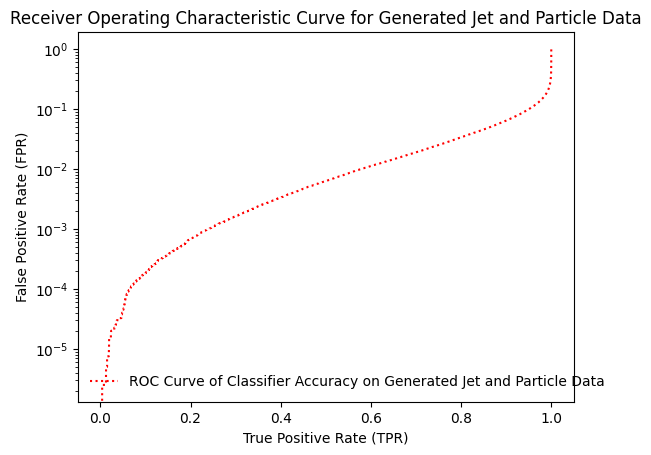

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 3 transformer

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=3)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2024-04-25 13:48:30.277374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 13:48:34.103029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38354 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-25 13:48:34.113278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38354 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-25 13:48:34.114905: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [ ]:
import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/3transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_3transformer.json', 'w') as f:
    json.dump(history.history, f)
    
model_cg.save('3transformer_combined_gen.h5')

2024-04-25 02:30:47.590140: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 02:30:50.667625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-25 02:30:50.676360: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-25 02:30:50.678023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Epoch 1/128


2024-04-25 02:30:58.493637: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 189s 6ms/step - loss: 0.2241 - accuracy: 0.9086 - val_loss: 0.2008 - val_accuracy: 0.9189
Epoch 2/128
30000/30000 [==============================] - 179s 6ms/step - loss: 0.1869 - accuracy: 0.9242 - val_loss: 0.1937 - val_accuracy: 0.9206
Epoch 10/128
30000/30000 [==============================] - ETA: 0s - loss: 0.1863 - accuracy: 0.9242
Epoch 10: saving model to cg_transformers_checkpoints/3transformer_checkpoint_10.h5
30000/30000 [==============================] - 181s 6ms/step - loss: 0.1863 - accuracy: 0.9242 - val_loss: 0.1869 - val_accuracy: 0.9233
Epoch 11/128
30000/30000 [==============================] - 186s 6ms/step - loss: 0.1830 - accuracy: 0.9256 - val_loss: 0.1853 - val_accuracy: 0.9247
Epoch 18/128
 8332/30000 [=======>......................] - ETA: 2:01 - loss: 0.1826 - accuracy: 0.9256

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



30000/30000 [==============================] - 180s 6ms/step - loss: 0.1815 - accuracy: 0.9260 - val_loss: 0.1849 - val_accuracy: 0.9250
Epoch 22/128
30000/30000 [==============================] - 178s 6ms/step - loss: 0.1812 - accuracy: 0.9264 - val_loss: 0.1862 - val_accuracy: 0.9249
Epoch 23/128
30000/30000 [==============================] - 177s 6ms/step - loss: 0.1809 - accuracy: 0.9267 - val_loss: 0.1835 - val_accuracy: 0.9254
Epoch 24/128
30000/30000 [==============================] - 177s 6ms/step - loss: 0.1807 - accuracy: 0.9268 - val_loss: 0.1839 - val_accuracy: 0.9253
Epoch 25/128
23398/30000 [======================>.......] - ETA: 36s - loss: 0.1803 - accuracy: 0.9267

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



30000/30000 [==============================] - 180s 6ms/step - loss: 0.1793 - accuracy: 0.9271 - val_loss: 0.1822 - val_accuracy: 0.9254
Epoch 30/128
30000/30000 [==============================] - 182s 6ms/step - loss: 0.1789 - accuracy: 0.9273 - val_loss: 0.1813 - val_accuracy: 0.9261
Epoch 32/128
29997/30000 [============================>.] - ETA: 0s - loss: 0.1780 - accuracy: 0.9278
Epoch 35: saving model to cg_transformers_checkpoints/3transformer_checkpoint_35.h5
30000/30000 [==============================] - 182s 6ms/step - loss: 0.1780 - accuracy: 0.9278 - val_loss: 0.1820 - val_accuracy: 0.9258
Epoch 36/128
 9244/30000 [========>.....................] - ETA: 1:56 - loss: 0.1782 - accuracy: 0.9275

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



30000/30000 [==============================] - 176s 6ms/step - loss: 0.1772 - accuracy: 0.9280 - val_loss: 0.1852 - val_accuracy: 0.9247
Epoch 40/128
27578/30000 [==========================>...] - ETA: 13s - loss: 0.1771 - accuracy: 0.9280

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [4]:
model_cg.load_weights('3transformer_combined_gen.h5')

In [5]:
predictions_cg = model_cg.predict(X_test_scaled)

2024-04-25 13:48:39.686252: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25000/25000 [==============================] - 56s 2ms/step


Classifier AUC: 0.9781278358156249


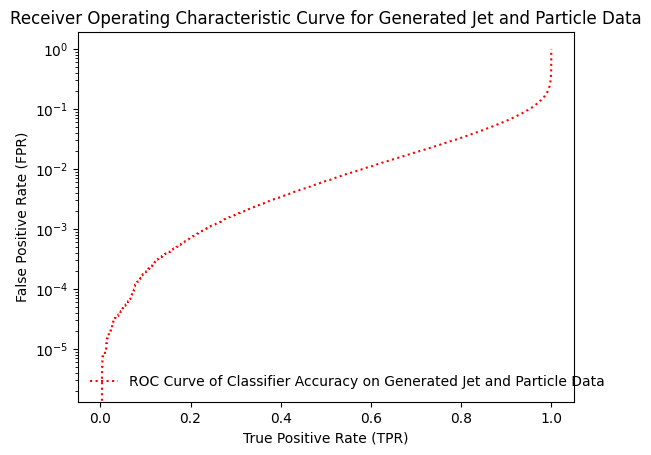

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 4 transformers 

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=4)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/4transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_4transformer.json', 'w') as f:
    json.dump(history.history, f)
    
model_cg.save('4transformer_combined_gen.h5')

30000/30000 [==============================] - 226s 7ms/step - loss: 0.2231 - accuracy: 0.9089 - val_loss: 0.2053 - val_accuracy: 0.9141
Epoch 2/128
30000/30000 [==============================] - 224s 7ms/step - loss: 0.1993 - accuracy: 0.9185 - val_loss: 0.1944 - val_accuracy: 0.9211
Epoch 3/128
30000/30000 [==============================] - 222s 7ms/step - loss: 0.1951 - accuracy: 0.9206 - val_loss: 0.1922 - val_accuracy: 0.9221
Epoch 4/128
30000/30000 [==============================] - 220s 7ms/step - loss: 0.1927 - accuracy: 0.9216 - val_loss: 0.1900 - val_accuracy: 0.9229
Epoch 5/128
29995/30000 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.9225
Epoch 5: saving model to cg_transformers_checkpoints/4transformer_checkpoint_05.h5
30000/30000 [==============================] - 221s 7ms/step - loss: 0.1907 - accuracy: 0.9225 - val_loss: 0.1937 - val_accuracy: 0.9222
Epoch 6/128
30000/30000 [==============================] - 221s 7ms/step - loss: 0.1895 - accur

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



30000/30000 [==============================] - 218s 7ms/step - loss: 0.1836 - accuracy: 0.9255 - val_loss: 0.1851 - val_accuracy: 0.9247
Epoch 15/128
29996/30000 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.9256
Epoch 15: saving model to cg_transformers_checkpoints/4transformer_checkpoint_15.h5
30000/30000 [==============================] - 219s 7ms/step - loss: 0.1833 - accuracy: 0.9256 - val_loss: 0.1847 - val_accuracy: 0.9251
Epoch 16/128
30000/30000 [==============================] - 218s 7ms/step - loss: 0.1828 - accuracy: 0.9256 - val_loss: 0.1842 - val_accuracy: 0.9251
Epoch 17/128
30000/30000 [==============================] - 218s 7ms/step - loss: 0.1823 - accuracy: 0.9261 - val_loss: 0.1829 - val_accuracy: 0.9259
Epoch 18/128
30000/30000 [==============================] - 218s 7ms/step - loss: 0.1820 - accuracy: 0.9260 - val_loss: 0.1832 - val_accuracy: 0.9256
Epoch 19/128
30000/30000 [==============================] - 223s 7ms/step - loss: 0.1773 -

In [8]:
model_cg.load_weights('4transformer_combined_gen.h5')

In [9]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 63s 3ms/step


Classifier AUC: 0.978417300815625


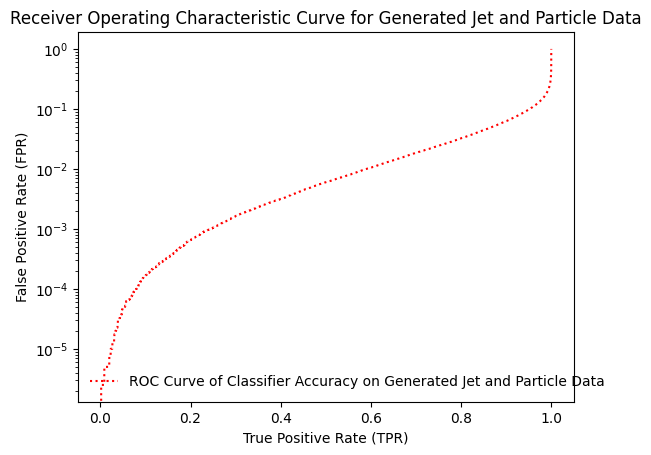

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 5 transformers

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=5)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/5transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_5transformer.json', 'w') as f:
    json.dump(history.history, f)
    
model_cg.save('5transformer_combined_gen.h5')

Epoch 1/128
30000/30000 [==============================] - 259s 9ms/step - loss: 0.2284 - accuracy: 0.9074 - val_loss: 0.2000 - val_accuracy: 0.9164
Epoch 2/128
30000/30000 [==============================] - 254s 8ms/step - loss: 0.1984 - accuracy: 0.9194 - val_loss: 0.1976 - val_accuracy: 0.9191
Epoch 3/128
30000/30000 [==============================] - 254s 8ms/step - loss: 0.1937 - accuracy: 0.9211 - val_loss: 0.1894 - val_accuracy: 0.9233
Epoch 4/128
30000/30000 [==============================] - 249s 8ms/step - loss: 0.1914 - accuracy: 0.9223 - val_loss: 0.1904 - val_accuracy: 0.9226
Epoch 5/128
29997/30000 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9228
Epoch 5: saving model to cg_transformers_checkpoints/5transformer_checkpoint_05.h5
30000/30000 [==============================] - 247s 8ms/step - loss: 0.1896 - accuracy: 0.9228 - val_loss: 0.1888 - val_accuracy: 0.9225
Epoch 6/128
30000/30000 [==============================] - 243s 8ms/step - loss: 0.

In [12]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 70s 3ms/step


Classifier AUC: 0.97882957664375


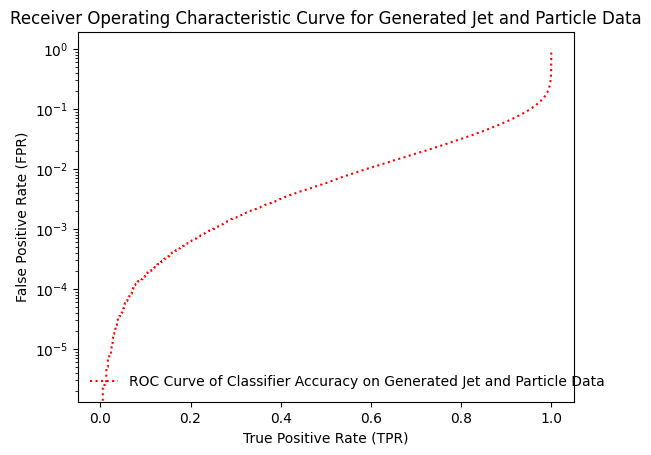

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 6 transformers

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming your model definition is already provided and instantiated
model_cg = DeepSetsAttClass(num_feat=5, num_transformer=6)

model_cg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import json

early_stopping_cg = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cg = ModelCheckpoint('cg_transformers_checkpoints/6transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history = model_cg.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cg, model_checkpoint_cg])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cg_6transformer.json', 'w') as f:
    json.dump(history.history, f)
    
model_cg.save('6transformer_combined_gen.h5')

2024-04-25 20:20:05.626710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 20:20:08.568263: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-25 20:20:08.577066: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-25 20:20:08.578776: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Epoch 1/128


2024-04-25 20:20:16.392890: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 296s 10ms/step - loss: 0.2274 - accuracy: 0.9075 - val_loss: 0.2044 - val_accuracy: 0.9155
Epoch 2/128
30000/30000 [==============================] - 288s 10ms/step - loss: 0.1999 - accuracy: 0.9183 - val_loss: 0.2013 - val_accuracy: 0.9203
Epoch 3/128
30000/30000 [==============================] - 294s 10ms/step - loss: 0.1945 - accuracy: 0.9209 - val_loss: 0.1902 - val_accuracy: 0.9226
Epoch 4/128
30000/30000 [==============================] - 288s 10ms/step - loss: 0.1921 - accuracy: 0.9222 - val_loss: 0.1926 - val_accuracy: 0.9215
Epoch 5/128
29994/30000 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9226
Epoch 5: saving model to cg_transformers_checkpoints/6transformer_checkpoint_05.h5
30000/30000 [==============================] - 278s 9ms/step - loss: 0.1904 - accuracy: 0.9226 - val_loss: 0.1933 - val_accuracy: 0.9226
Epoch 6/128
30000/30000 [==============================] - 279s 9ms/step - loss: 0.1892 - a

In [4]:
predictions_cg = model_cg.predict(X_test_scaled)

25000/25000 [==============================] - 78s 3ms/step


Classifier AUC: 0.978159462746875


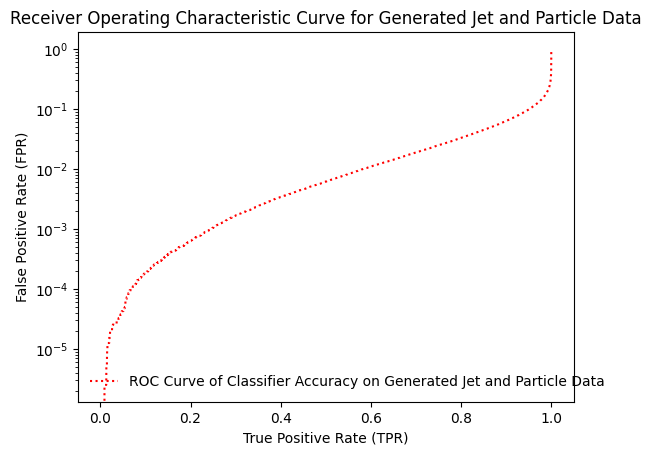

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_gen, tpr_combine_gen, _ = roc_curve(y_test,predictions_cg, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_gen, tpr_combine_gen)))
plt.plot(tpr_combine_gen,fpr_combine_gen,label="ROC Curve of Classifier Accuracy on Generated Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

## REAL DATA

In [14]:
#using transformer model architecture to determine the classifier performance on the real particle data
import utils
import h5py as h5
import numpy as np

filepaths = [
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_train.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_train.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_test.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_test.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/gluon_val.h5',
    '/global/cfs/cdirs/m3246/vmikuni/TOP/top_val.h5'
]

with h5.File(filepaths[0], "r") as h5f:
    real_gluon_parts = h5f['data'][()].astype(np.float32)
    real_gluon_jets = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[1], "r") as h5f:
    real_top_parts = h5f['data'][()].astype(np.float32)
    real_top_jets = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[2], "r") as h5f:
    real_gluon_parts_test = h5f['data'][()].astype(np.float32)
    real_gluon_jets_test = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[3], "r") as h5f:
    real_top_parts_test = h5f['data'][()].astype(np.float32)
    real_top_jets_test = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[4], "r") as h5f:
    real_gluon_parts_val = h5f['data'][()].astype(np.float32)
    real_gluon_jets_val = h5f['jet'][()].astype(np.float32)
with h5.File(filepaths[5], "r") as h5f:
    real_top_parts_val = h5f['data'][()].astype(np.float32)
    real_top_jets_val = h5f['jet'][()].astype(np.float32)

print(real_gluon_parts.shape, real_gluon_parts_test.shape, real_gluon_parts_val.shape)
print(real_gluon_jets.shape, real_gluon_jets_test.shape, real_gluon_jets_val.shape)
print(real_top_parts.shape, real_top_parts_test.shape, real_top_parts_val.shape)
print(real_top_jets.shape, real_top_jets_test.shape, real_top_jets_val.shape)

# Define the model architecture as described
def DeepSetsAttClass(num_feat, num_heads=4, num_transformer=4, projection_dim=32):
    inputs = Input((None, num_feat))
    masked_inputs = layers.Masking(mask_value=0.0, name='Mask')(inputs)

    masked_features = TimeDistributed(Dense(projection_dim, activation=None))(masked_inputs)
    
    tdd = TimeDistributed(Dense(projection_dim, activation=None))(masked_features)
    tdd = TimeDistributed(layers.LeakyReLU(alpha=0.01))(tdd)
    encoded_patches = TimeDistributed(Dense(projection_dim))(tdd)

    for _ in range(num_transformer):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim//num_heads, dropout=0.1)(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)                
        x3 = layers.Dense(4*projection_dim, activation="gelu")(x3)
        x3 = layers.Dense(projection_dim, activation="gelu")(x3)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    pooled = layers.GlobalAvgPool1D()(representation)
    representation = Dense(2*projection_dim, activation=None)(pooled)
    representation = layers.Dropout(0.1)(representation)
    representation = layers.LeakyReLU(alpha=0.01)(representation)
    
    outputs = Dense(1, activation='sigmoid')(representation)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


(605523, 100, 3) (201914, 100, 3) (201503, 100, 3)
(605523, 2) (201914, 2) (201503, 2)
(605477, 100, 3) (202086, 100, 3) (201497, 100, 3)
(605477, 2) (202086, 2) (201497, 2)


In [15]:
import numpy as np

# Assuming real_gluon_parts, real_gluon_parts_test, and real_gluon_parts_val are already defined and compatible for concatenation
real_gluon_parts_combined = np.concatenate([real_gluon_parts, real_gluon_parts_test, real_gluon_parts_val], axis=0)

# Assuming real_gluon_jets, real_gluon_jets_test, and real_gluon_jets_val are already defined and compatible for concatenation
real_gluon_jets_combined = np.concatenate([real_gluon_jets, real_gluon_jets_test, real_gluon_jets_val], axis=0)

# Assuming real_top_parts, real_top_parts_test, and real_top_parts_val are already defined and compatible for concatenation
real_top_parts_combined = np.concatenate([real_top_parts, real_top_parts_test, real_top_parts_val], axis=0)

# Assuming real_top_jets, real_top_jets_test, and real_top_jets_val are already defined and compatible for concatenation
real_top_jets_combined = np.concatenate([real_top_jets, real_top_jets_test, real_top_jets_val], axis=0)

# Optionally, print shapes to confirm
print("Combined real_gluon_parts shape:", real_gluon_parts_combined.shape)
print("Combined real_gluon_jets shape:", real_gluon_jets_combined.shape)
print("Combined real_top_parts shape:", real_top_parts_combined.shape)
print("Combined real_top_jets shape:", real_top_jets_combined.shape)


Combined real_gluon_parts shape: (1008940, 100, 3)
Combined real_gluon_jets shape: (1008940, 2)
Combined real_top_parts shape: (1009060, 100, 3)
Combined real_top_jets shape: (1009060, 2)


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def combine_features(particles, jets):
    # Create a mask for non-padded particles
    mask = np.any(particles != 0, axis=-1, keepdims=True)
    # Repeat jet features to match the particles shape
    jets_expanded = np.repeat(jets[:, np.newaxis, :], particles.shape[1], axis=1)
    # Use the mask to zero out jet features where particles are padded
    jets_masked = jets_expanded * mask
    # Concatenate the particle features and the masked jet features
    combined = np.concatenate([particles, jets_masked], axis=-1)
    return combined


# Combine your datasets
real_gluon_combined = combine_features(real_gluon_parts_combined, real_gluon_jets_combined)
real_top_combined = combine_features(real_top_parts_combined, real_top_jets_combined)

# Create labels
labels_gluon_real = np.zeros((real_gluon_combined.shape[0], 1))
labels_top_real = np.ones((real_top_combined.shape[0], 1))

# Splitting data for training and testing
X_real = np.concatenate([real_gluon_combined[:600000], real_top_combined[:600000]])
y_real = np.concatenate([labels_gluon_real[:600000], labels_top_real[:600000]])

# For test data
X_test_real = np.concatenate([real_gluon_combined[600000:], real_top_combined[600000:]])
y_test_real = np.concatenate([labels_gluon_real[600000:], labels_top_real[600000:]])

# Whitening (Standardization)
scaler_real = StandardScaler()
# Flatten the data to apply standard scaling
X_flattened_real = X_real.reshape(X_real.shape[0], -1)
X_test_flattened_real = X_test_real.reshape(X_test_real.shape[0], -1)

X_scaled_real = scaler_real.fit_transform(X_flattened_real)
X_test_scaled_real = scaler_real.transform(X_test_flattened_real)

# Reshape back to original shape after scaling
X_scaled_real = X_scaled_real.reshape(X_real.shape)
X_test_scaled_real = X_test_scaled_real.reshape(X_test_real.shape)

# Split data for training and validation
X_train_real, X_val_real, y_train_real, y_val_real = train_test_split(X_scaled_real, y_real, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=0)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-04-24 00:13:19.368884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 00:13:22.063829: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-24 00:13:22.070310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-24 00:13:22.071989: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [7]:
early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/0transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])

Epoch 1/128


2024-04-24 00:13:34.591811: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 56s 2ms/step - loss: 0.2508 - accuracy: 0.8989 - val_loss: 0.2480 - val_accuracy: 0.8997
Epoch 2/128
30000/30000 [==============================] - 50s 2ms/step - loss: 0.2451 - accuracy: 0.9008 - val_loss: 0.2440 - val_accuracy: 0.9003
Epoch 3/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2429 - accuracy: 0.9014 - val_loss: 0.2379 - val_accuracy: 0.9028
Epoch 4/128
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2405 - accuracy: 0.9021 - val_loss: 0.2387 - val_accuracy: 0.9018
Epoch 5/128
29992/30000 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9029
Epoch 5: saving model to cr_transformers_checkpoints/0transformer_checkpoint_05.h5
30000/30000 [==============================] - 51s 2ms/step - loss: 0.2383 - accuracy: 0.9029 - val_loss: 0.2362 - val_accuracy: 0.9035
Epoch 6/128
30000/30000 [==============================] - 52s 2ms/step - loss: 0.2362 - accuracy: 0

NameError: name 'json' is not defined

In [8]:
import json
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_0transformer.json', 'w') as f:
    json.dump(history_real.history, f)

In [9]:
model_cr.save('0transformer_combined_real.h5')

In [10]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 18s 717us/step


Classifier AUC: 0.9734349875082403


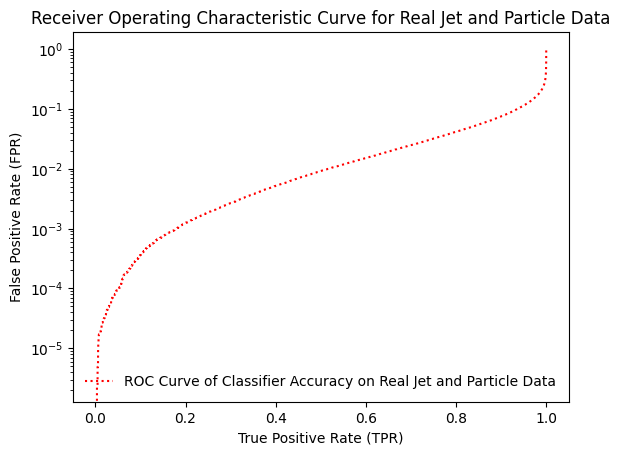

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 1 transformer

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=1)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/1transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_1transformer.json', 'w') as f:
    json.dump(history_real.history, f)

Epoch 1/128
30000/30000 [==============================] - 102s 3ms/step - loss: 0.2438 - accuracy: 0.9012 - val_loss: 0.2285 - val_accuracy: 0.9062
Epoch 2/128
30000/30000 [==============================] - 101s 3ms/step - loss: 0.2145 - accuracy: 0.9118 - val_loss: 0.2023 - val_accuracy: 0.9165
Epoch 3/128
30000/30000 [==============================] - 100s 3ms/step - loss: 0.2040 - accuracy: 0.9169 - val_loss: 0.2038 - val_accuracy: 0.9182
Epoch 4/128
30000/30000 [==============================] - 100s 3ms/step - loss: 0.1999 - accuracy: 0.9188 - val_loss: 0.1963 - val_accuracy: 0.9205
Epoch 5/128
29997/30000 [============================>.] - ETA: 0s - loss: 0.1969 - accuracy: 0.9203
Epoch 5: saving model to cr_transformers_checkpoints/1transformer_checkpoint_05.h5
30000/30000 [==============================] - 102s 3ms/step - loss: 0.1969 - accuracy: 0.9203 - val_loss: 0.1932 - val_accuracy: 0.9217
Epoch 6/128
30000/30000 [==============================] - 98s 3ms/step - loss: 0.1

In [13]:
model_cr.save('1transformer_combined_real.h5')

In [14]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 39s 2ms/step


Classifier AUC: 0.9786927985234071


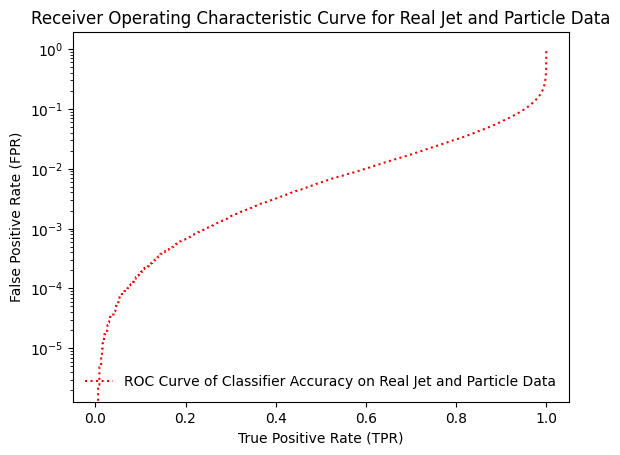

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 2 transformer

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout
import json
# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=2)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/2transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_2transformer.json', 'w') as f:
    json.dump(history_real.history, f)

2024-04-24 03:15:03.574321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 03:15:06.397474: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-24 03:15:06.405759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-24 03:15:06.407316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Epoch 1/128


2024-04-24 03:15:12.705324: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 144s 5ms/step - loss: 0.2386 - accuracy: 0.9029 - val_loss: 0.2136 - val_accuracy: 0.9121
Epoch 2/128
30000/30000 [==============================] - 138s 5ms/step - loss: 0.2054 - accuracy: 0.9163 - val_loss: 0.1990 - val_accuracy: 0.9186
Epoch 3/128
30000/30000 [==============================] - 137s 5ms/step - loss: 0.1980 - accuracy: 0.9197 - val_loss: 0.1931 - val_accuracy: 0.9216
Epoch 4/128
30000/30000 [==============================] - 136s 5ms/step - loss: 0.1939 - accuracy: 0.9215 - val_loss: 0.1914 - val_accuracy: 0.9225
Epoch 5/128
29991/30000 [============================>.] - ETA: 0s - loss: 0.1910 - accuracy: 0.9230
Epoch 5: saving model to cr_transformers_checkpoints/2transformer_checkpoint_05.h5
30000/30000 [==============================] - 138s 5ms/step - loss: 0.1910 - accuracy: 0.9230 - val_loss: 0.1868 - val_accuracy: 0.9238
Epoch 6/128
30000/30000 [==============================] - 134s 4ms/step - loss: 0.1894 - accur

In [5]:
model_cr.save('2transformer_combined_real.h5')

In [6]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 60s 2ms/step


Classifier AUC: 0.9794329558883473


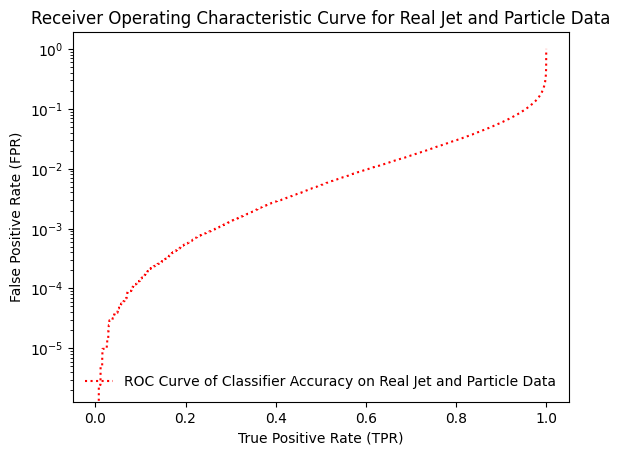

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 3 transformer

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=3)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/3transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_3transformer.json', 'w') as f:
    json.dump(history_real.history, f)

Epoch 1/128
30000/30000 [==============================] - 180s 6ms/step - loss: 0.2400 - accuracy: 0.9025 - val_loss: 0.2127 - val_accuracy: 0.9120
Epoch 2/128
30000/30000 [==============================] - 183s 6ms/step - loss: 0.2060 - accuracy: 0.9162 - val_loss: 0.2008 - val_accuracy: 0.9190
Epoch 3/128
30000/30000 [==============================] - 180s 6ms/step - loss: 0.1973 - accuracy: 0.9201 - val_loss: 0.1974 - val_accuracy: 0.9196
Epoch 4/128
30000/30000 [==============================] - 176s 6ms/step - loss: 0.1927 - accuracy: 0.9219 - val_loss: 0.1886 - val_accuracy: 0.9236
Epoch 5/128
29999/30000 [============================>.] - ETA: 0s - loss: 0.1897 - accuracy: 0.9233
Epoch 5: saving model to cr_transformers_checkpoints/3transformer_checkpoint_05.h5
30000/30000 [==============================] - 175s 6ms/step - loss: 0.1897 - accuracy: 0.9233 - val_loss: 0.1868 - val_accuracy: 0.9241
Epoch 6/128
30000/30000 [==============================] - 179s 6ms/step - loss: 0.

In [9]:
model_cr.save('3transformer_combined_real.h5')

In [10]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 77s 3ms/step


Classifier AUC: 0.9799004911146022


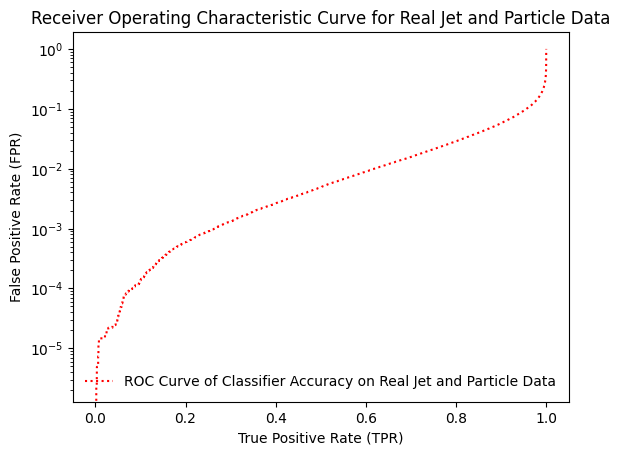

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 4 transformer

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=4)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/4transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_4transformer.json', 'w') as f:
    json.dump(history_real.history, f)

model_cr.save('4transformer_combined_real.h5')

In [ ]:
model_cr.load_weights('4transformer_combined_real.h5')

In [ ]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 5 transformer

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=5)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/5transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])

2024-04-26 19:14:00.092660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 19:14:02.914693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-26 19:14:02.921721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-26 19:14:02.923388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Epoch 1/128


2024-04-26 19:14:10.237879: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 253s 8ms/step - loss: 0.2335 - accuracy: 0.9052 - val_loss: 0.2112 - val_accuracy: 0.9137
Epoch 2/128
30000/30000 [==============================] - 242s 8ms/step - loss: 0.2023 - accuracy: 0.9178 - val_loss: 0.1923 - val_accuracy: 0.9214
Epoch 3/128
30000/30000 [==============================] - 241s 8ms/step - loss: 0.1950 - accuracy: 0.9211 - val_loss: 0.1942 - val_accuracy: 0.9220
Epoch 4/128
30000/30000 [==============================] - 245s 8ms/step - loss: 0.1909 - accuracy: 0.9228 - val_loss: 0.1888 - val_accuracy: 0.9231
Epoch 5/128
29995/30000 [============================>.] - ETA: 0s - loss: 0.1882 - accuracy: 0.9241
Epoch 5: saving model to cr_transformers_checkpoints/5transformer_checkpoint_05.h5
30000/30000 [==============================] - 249s 8ms/step - loss: 0.1882 - accuracy: 0.9241 - val_loss: 0.1864 - val_accuracy: 0.9250
Epoch 6/128
30000/30000 [==============================] - 240s 8ms/step - loss: 0.1859 - accur

NameError: name 'json' is not defined

In [5]:
import json
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_5transformer.json', 'w') as f:
    json.dump(history_real.history, f)

model_cr.save('5transformer_combined_real.h5')

In [6]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 99s 4ms/step


Classifier AUC: 0.9800874633838563


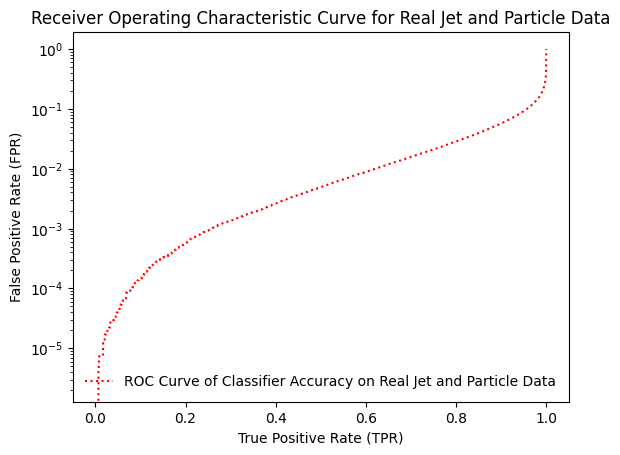

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### 6 transformer

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=6)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2024-04-27 11:50:52.670479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 11:50:55.423677: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-27 11:50:55.430677: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-27 11:50:55.432318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [5]:
model_cr.load_weights('6transformer_combined_real.h5')

In [ ]:
early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/6transformer_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_6transformer.json', 'w') as f:
    json.dump(history_real.history, f)

model_cr.save('6transformer_combined_real.h5')

Epoch 1/128
30000/30000 [==============================] - 282s 9ms/step - loss: 0.2461 - accuracy: 0.9005 - val_loss: 0.2247 - val_accuracy: 0.9058
Epoch 2/128
30000/30000 [==============================] - 286s 10ms/step - loss: 0.2125 - accuracy: 0.9128 - val_loss: 0.2046 - val_accuracy: 0.9165
Epoch 3/128
30000/30000 [==============================] - 283s 9ms/step - loss: 0.2001 - accuracy: 0.9186 - val_loss: 0.1951 - val_accuracy: 0.9209
Epoch 4/128
30000/30000 [==============================] - 277s 9ms/step - loss: 0.1950 - accuracy: 0.9210 - val_loss: 0.1902 - val_accuracy: 0.9222
Epoch 5/128
29996/30000 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9226
Epoch 5: saving model to cr_transformers_checkpoints/6transformer_checkpoint_05.h5
30000/30000 [==============================] - 276s 9ms/step - loss: 0.1911 - accuracy: 0.9226 - val_loss: 0.1884 - val_accuracy: 0.9236
Epoch 6/128
30000/30000 [==============================] - 281s 9ms/step - loss: 0

In [6]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

2024-04-27 11:51:01.489319: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25563/25563 [==============================] - 120s 5ms/step


Classifier AUC: 0.9799367889465775


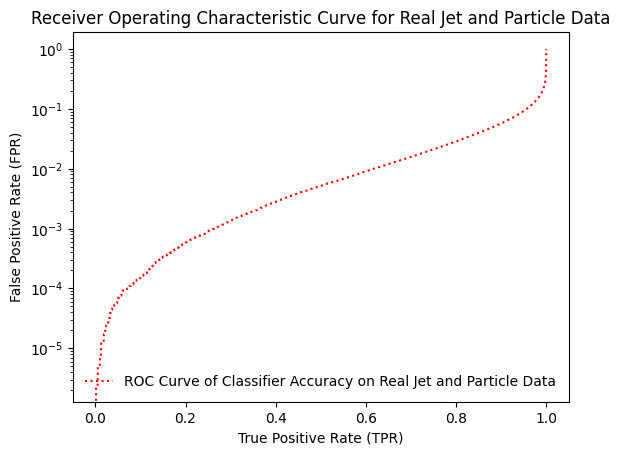

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

### plotting all transformers

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=6)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('6transformer_combined_real.h5')
predictions_cr_6trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_6, tpr_combine_real_6, _ = roc_curve(y_test_real,predictions_cr_6trans, pos_label=1)

model_cr = DeepSetsAttClass(num_feat=5, num_transformer=5)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('5transformer_combined_real.h5')
predictions_cr_5trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_5, tpr_combine_real_5, _ = roc_curve(y_test_real,predictions_cr_5trans, pos_label=1)

model_cr = DeepSetsAttClass(num_feat=5, num_transformer=4)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('4transformer_combined_real.h5')
predictions_cr_4trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_4, tpr_combine_real_4, _ = roc_curve(y_test_real,predictions_cr_4trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=3)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('3transformer_combined_real.h5')
predictions_cr_3trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_3, tpr_combine_real_3, _ = roc_curve(y_test_real,predictions_cr_3trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=2)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('2transformer_combined_real.h5')
predictions_cr_2trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_2, tpr_combine_real_2, _ = roc_curve(y_test_real,predictions_cr_2trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=1)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('1transformer_combined_real.h5')
predictions_cr_1trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_1, tpr_combine_real_1, _ = roc_curve(y_test_real,predictions_cr_1trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=0)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('0transformer_combined_real.h5')
predictions_cr_0trans = model_cr.predict(X_test_scaled_real)
fpr_combine_real_0, tpr_combine_real_0, _ = roc_curve(y_test_real,predictions_cr_0trans, pos_label=1)


25563/25563 [==============================] - 19s 731us/step


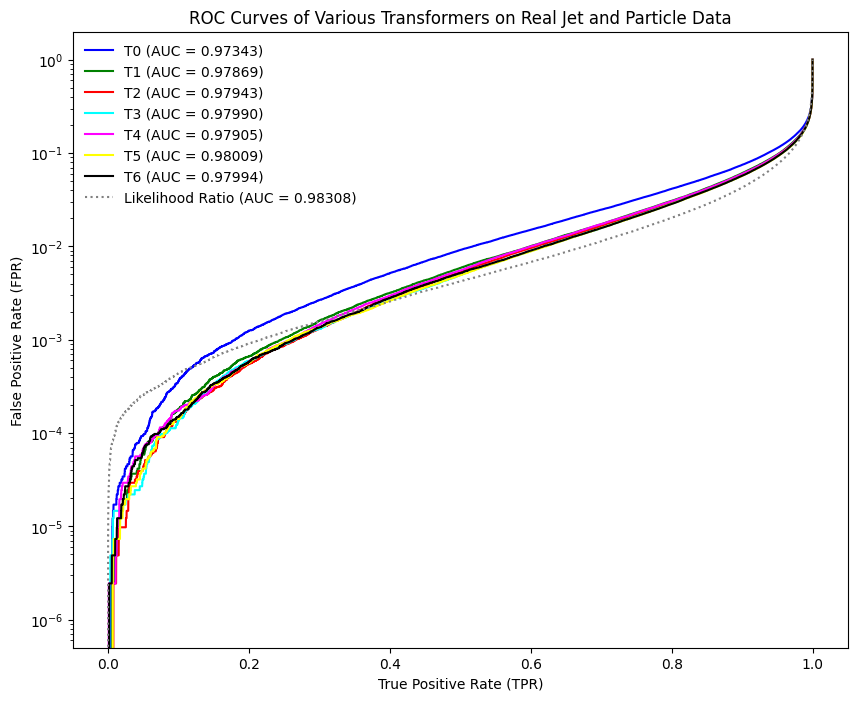

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define your TPR and FPR from each model
fprs = [fpr_combine_real_0, fpr_combine_real_1, fpr_combine_real_2, fpr_combine_real_3, fpr_combine_real_4, fpr_combine_real_5, fpr_combine_real_6]
tprs = [tpr_combine_real_0, tpr_combine_real_1, tpr_combine_real_2, tpr_combine_real_3, tpr_combine_real_4, tpr_combine_real_5, tpr_combine_real_6]
aucs = [auc(fpr_combine_real_0, tpr_combine_real_0), auc(fpr_combine_real_1, tpr_combine_real_1), auc(fpr_combine_real_2, tpr_combine_real_2),
        auc(fpr_combine_real_3, tpr_combine_real_3), auc(fpr_combine_real_4, tpr_combine_real_4), auc(fpr_combine_real_5, tpr_combine_real_5), auc(fpr_combine_real_6, tpr_combine_real_6)]

# Colors for the different ROC curves
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

# Plot each ROC curve
plt.figure(figsize=(10, 8))
for i, (fpr_r, tpr_r, color) in enumerate(zip(fprs, tprs, colors)):
    plt.plot(tpr_r, fpr_r, label=f"T{i} (AUC = {aucs[i]:.5f})", color=color)
plt.plot(tpr,fpr,label=f"Likelihood Ratio (AUC = {auc(fpr, tpr):.5f})",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('ROC Curves of Various Transformers on Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False, fontsize=10)
plt.savefig('genreal.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=6)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('6transformer_combined_gen.h5')
predictions_cr_6trans = model_cr.predict(X_test_scaled)
fpr_combine_real_6, tpr_combine_real_6, _ = roc_curve(y_test,predictions_cr_6trans, pos_label=1)

model_cr = DeepSetsAttClass(num_feat=5, num_transformer=5)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('5transformer_combined_gen.h5')
predictions_cr_5trans = model_cr.predict(X_test_scaled)
fpr_combine_real_5, tpr_combine_real_5, _ = roc_curve(y_test,predictions_cr_5trans, pos_label=1)

model_cr = DeepSetsAttClass(num_feat=5, num_transformer=4)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('4transformer_combined_gen.h5')
predictions_cr_4trans = model_cr.predict(X_test_scaled)
fpr_combine_real_4, tpr_combine_real_4, _ = roc_curve(y_test,predictions_cr_4trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=3)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('3transformer_combined_gen.h5')
predictions_cr_3trans = model_cr.predict(X_test_scaled)
fpr_combine_real_3, tpr_combine_real_3, _ = roc_curve(y_test,predictions_cr_3trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=2)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('2transformer_combined_gen.h5')
predictions_cr_2trans = model_cr.predict(X_test_scaled)
fpr_combine_real_2, tpr_combine_real_2, _ = roc_curve(y_test,predictions_cr_2trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=1)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('1transformer_combined_gen.h5')
predictions_cr_1trans = model_cr.predict(X_test_scaled)
fpr_combine_real_1, tpr_combine_real_1, _ = roc_curve(y_test,predictions_cr_1trans, pos_label=1)


model_cr = DeepSetsAttClass(num_feat=5, num_transformer=0)
model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cr.load_weights('0transformer_combined_gen.h5')
predictions_cr_0trans = model_cr.predict(X_test_scaled)
fpr_combine_real_0, tpr_combine_real_0, _ = roc_curve(y_test,predictions_cr_0trans, pos_label=1)


2024-05-12 16:34:18.231499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-12 16:34:20.808256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38218 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-05-12 16:34:20.814617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38218 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-05-12 16:34:20.816242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

25000/25000 [==============================] - 19s 743us/step


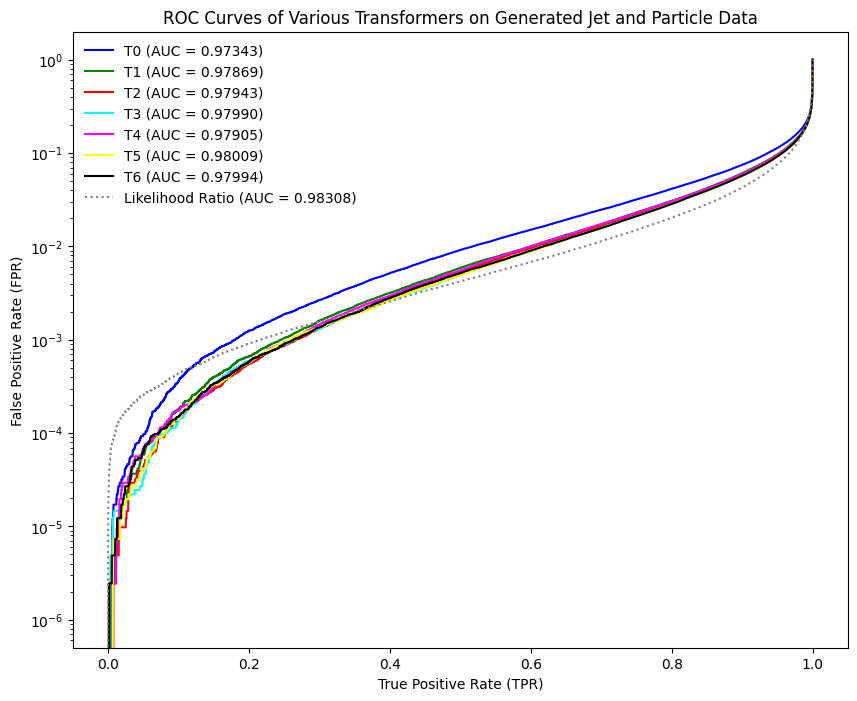

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define your TPR and FPR from each model
fprs = [fpr_combine_real_0, fpr_combine_real_1, fpr_combine_real_2, fpr_combine_real_3, fpr_combine_real_4, fpr_combine_real_5, fpr_combine_real_6]
tprs = [tpr_combine_real_0, tpr_combine_real_1, tpr_combine_real_2, tpr_combine_real_3, tpr_combine_real_4, tpr_combine_real_5, tpr_combine_real_6]
aucs = [auc(fpr_combine_real_0, tpr_combine_real_0), auc(fpr_combine_real_1, tpr_combine_real_1), auc(fpr_combine_real_2, tpr_combine_real_2),
        auc(fpr_combine_real_3, tpr_combine_real_3), auc(fpr_combine_real_4, tpr_combine_real_4), auc(fpr_combine_real_5, tpr_combine_real_5), auc(fpr_combine_real_6, tpr_combine_real_6)]

# Colors for the different ROC curves
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

# Plot each ROC curve
plt.figure(figsize=(10, 8))
for i, (fpr_g, tpr_g, color) in enumerate(zip(fprs, tprs, colors)):
    plt.plot(tpr_g, fpr_g, label=f"T{i} (AUC = {aucs[i]:.5f})", color=color)
plt.plot(tpr,fpr,label=f"Likelihood Ratio (AUC = {auc(fpr, tpr):.5f})",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('ROC Curves of Various Transformers on Generated Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False, fontsize=10)
plt.savefig('gentrans.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Improved Version of Transformer Model

In [19]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dense, Masking, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, Dropout, LeakyReLU, Concatenate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
import numpy as np

def EnhancedDeepSetsModel(num_feat=5, num_heads=4, num_transformer=4, projection_dim=32):
    # Input split between particle data (first 3 features) and jet data (last 2 features)
    inputs = Input(shape=(100, num_feat))
    particle_data = inputs[:, :, :3]
    jet_data = inputs[:, :, 3:]

    # Particle branch
    particle_masked = Masking(mask_value=0.0)(particle_data)
    particle_features = TimeDistributed(Dense(projection_dim, activation=None))(particle_masked)
    particle_features = TimeDistributed(LeakyReLU(alpha=0.01))(particle_features)
    for _ in range(num_transformer):
        particle_features = TransformerBlock(num_heads, projection_dim)(particle_features)
    particle_representation = GlobalAvgPool1D()(particle_features)

    # Jet branch (simpler, as we're dealing with less complex data)
    jet_masked = Masking(mask_value=0.0)(jet_data)
    jet_features = TimeDistributed(Dense(projection_dim, activation="relu"))(jet_masked)
    jet_representation = GlobalAvgPool1D()(jet_features)

    # Combine features from both branches
    combined_representation = Concatenate()([particle_representation, jet_representation])
    combined_representation = Dense(2*projection_dim, activation="relu")(combined_representation)
    combined_representation = Dropout(0.1)(combined_representation)

    outputs = Dense(1, activation='sigmoid')(combined_representation)

    model = Model(inputs=inputs, outputs=outputs)
    return model

def TransformerBlock(num_heads, projection_dim):
    input_tensor = Input(shape=(None, projection_dim))
    x1 = LayerNormalization(epsilon=1e-6)(input_tensor)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim//num_heads, dropout=0.1)(x1, x1)
    x2 = layers.Add()([attention_output, input_tensor])
    x3 = LayerNormalization(epsilon=1e-6)(x2)
    x3 = Dense(4*projection_dim, activation="gelu")(x3)
    x3 = Dense(projection_dim, activation="gelu")(x3)
    output_tensor = layers.Add()([x3, x2])
    return Model(inputs=input_tensor, outputs=output_tensor)


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, LeakyReLU, Dropout

# Assuming your model definition is already provided and instantiated
model_cr = DeepSetsAttClass(num_feat=5, num_transformer=4)

model_cr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/enhanced_cr_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)

history_real = model_cr.fit(X_train_real, y_train_real,
                    validation_data=(X_val_real, y_val_real),
                    epochs=128,
                    batch_size=32,
                    callbacks=[early_stopping_cr, model_checkpoint_cr])

Epoch 1/128
30000/30000 [==============================] - 221s 7ms/step - loss: 0.2426 - accuracy: 0.9020 - val_loss: 0.2176 - val_accuracy: 0.9105
Epoch 2/128
30000/30000 [==============================] - 220s 7ms/step - loss: 0.2053 - accuracy: 0.9165 - val_loss: 0.1972 - val_accuracy: 0.9187
Epoch 3/128
30000/30000 [==============================] - 215s 7ms/step - loss: 0.1962 - accuracy: 0.9206 - val_loss: 0.1884 - val_accuracy: 0.9237
Epoch 4/128
30000/30000 [==============================] - 217s 7ms/step - loss: 0.1914 - accuracy: 0.9225 - val_loss: 0.1854 - val_accuracy: 0.9246
Epoch 5/128
29993/30000 [============================>.] - ETA: 0s - loss: 0.1885 - accuracy: 0.9240
Epoch 5: saving model to cr_transformers_checkpoints/enhanced_cr_checkpoint_05.h5
30000/30000 [==============================] - 219s 7ms/step - loss: 0.1885 - accuracy: 0.9240 - val_loss: 0.1928 - val_accuracy: 0.9216
Epoch 6/128
30000/30000 [==============================] - 219s 7ms/step - loss: 0.1

NameError: name 'json' is not defined

In [11]:
import json
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_enhanced.json', 'w') as f:
    json.dump(history_real.history, f)

model_cr.save('enhanced_combined_real.h5')

In [21]:
model_cr.load_weights('enhanced_combined_real.h5')

In [23]:

predictions_cr = model_cr.predict(X_test_scaled_real)

25563/25563 [==============================] - 95s 4ms/step


Classifier AUC: 0.9803326088629156


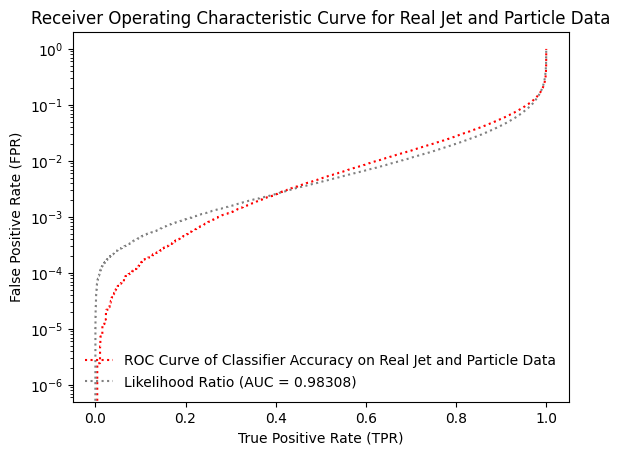

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.plot(tpr,fpr,label=f"Likelihood Ratio (AUC = {auc(fpr, tpr):.5f})",
                         color='gray',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dense, Masking, TimeDistributed, LayerNormalization, MultiHeadAttention, GlobalAvgPool1D, Dropout, LeakyReLU, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def cyclic_learning_rate(epoch, lr):
    # Example cyclic learning rate: base_lr to max_lr every 5 epochs
    base_lr, max_lr = 0.00001, 0.001
    step_size = 5
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    new_lr = base_lr + (max_lr - base_lr) * np.maximum(0, (1 - x))
    return new_lr

def TransformerBlock(num_heads, projection_dim, dropout_rate=0.1):
    input_tensor = Input(shape=(None, projection_dim))
    x1 = LayerNormalization(epsilon=1e-6)(input_tensor)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim // num_heads, dropout=dropout_rate)(x1, x1)
    x2 = layers.Add()([attention_output, input_tensor])
    x2 = Dropout(dropout_rate)(x2)  # Applying variational dropout
    x3 = LayerNormalization(epsilon=1e-6)(x2)
    x3 = Dense(4 * projection_dim, activation="gelu")(x3)
    x3 = Dense(projection_dim, activation="gelu")(x3)
    output_tensor = layers.Add()([x3, x2])
    return Model(inputs=input_tensor, outputs=output_tensor)

def EnhancedDeepSetsModel(num_feat=5, num_heads=8, num_transformer=6, projection_dim=64):
    inputs = Input(shape=(100, num_feat))
    particle_data = inputs[:, :, :3]
    jet_data = inputs[:, :, 3:]

    particle_masked = Masking(mask_value=0.0)(particle_data)
    particle_features = TimeDistributed(Dense(projection_dim, activation=None))(particle_masked)
    particle_features = TimeDistributed(LeakyReLU(alpha=0.01))(particle_features)
    for _ in range(num_transformer):
        particle_features = TransformerBlock(num_heads, projection_dim)(particle_features)
    particle_representation = GlobalAvgPool1D()(particle_features)

    jet_masked = Masking(mask_value=0.0)(jet_data)
    jet_features = TimeDistributed(Dense(projection_dim, activation="relu"))(jet_masked)
    jet_representation = GlobalAvgPool1D()(jet_features)

    combined_representation = Concatenate()([particle_representation, jet_representation])
    combined_representation = Dense(2 * projection_dim, activation="relu")(combined_representation)
    combined_representation = Dropout(0.1)(combined_representation)

    outputs = Dense(1, activation='sigmoid')(combined_representation)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [5]:

# Model instantiation
model_cr = EnhancedDeepSetsModel()

# Compile the model with gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model_cr.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Add learning rate scheduler
lr_scheduler = LearningRateScheduler(cyclic_learning_rate)

early_stopping_cr = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint_cr = ModelCheckpoint('cr_transformers_checkpoints/enhanced_new_cr_checkpoint_{epoch:02d}.h5', save_weights_only=True, period=5, verbose=1)


# Fit model
history_real = model_cr.fit(X_train_real, y_train_real, 
                         epochs=128, 
                         batch_size=32, 
                         validation_data=(X_val_real, y_val_real), 
                         callbacks=[early_stopping_cr, model_checkpoint_cr, lr_scheduler])

import json
with open('/pscratch/sd/n/nishank/scripts/history_transformers/history_cr_enhanced_2.json', 'w') as f:
    json.dump(history_real.history, f)

model_cr.save('enhanced_2_combined_real.h5')

Epoch 1/128


2024-04-28 01:12:41.491688: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30000/30000 [==============================] - 431s 14ms/step - loss: 0.2944 - accuracy: 0.8750 - val_loss: 0.3267 - val_accuracy: 0.8785 - lr: 1.0000e-05
Epoch 2/128
30000/30000 [==============================] - 420s 14ms/step - loss: 0.2251 - accuracy: 0.9076 - val_loss: 0.2057 - val_accuracy: 0.9158 - lr: 2.0800e-04
Epoch 3/128
30000/30000 [==============================] - 415s 14ms/step - loss: 0.2095 - accuracy: 0.9140 - val_loss: 0.1991 - val_accuracy: 0.9185 - lr: 4.0600e-04
Epoch 4/128
30000/30000 [==============================] - 418s 14ms/step - loss: 0.2043 - accuracy: 0.9164 - val_loss: 0.2006 - val_accuracy: 0.9175 - lr: 6.0400e-04
Epoch 5/128
29999/30000 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9173
Epoch 5: saving model to cr_transformers_checkpoints/enhanced_new_cr_checkpoint_05.h5
30000/30000 [==============================] - 415s 14ms/step - loss: 0.2017 - accuracy: 0.9173 - val_loss: 0.1971 - val_accuracy: 0.9190 - lr: 8.0200e-04
Ep

TypeError: Object of type float32 is not JSON serializable

In [ ]:
# Evaluate the model
model_cr.evaluate(X_test_scaled_real, y_test_real)

predictions_cr = model_cr.predict(X_test_scaled_real)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_cr, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

In [6]:
from tensorflow.keras.layers import Dense, Input, GlobalAvgPool1D
from tensorflow.keras.models import Model

def create_feature_extractor():
    base_model = EnhancedDeepSetsModel()  # assuming EnhancedDeepSetsModel is defined as before
    # Remove the last layer (output layer)
    feature_model = Model(inputs=base_model.input, outputs=base_model.layers[-3].output)
    return feature_model

# Create the feature extractor model
feature_extractor = create_feature_extractor()
# Assuming X_train_real, X_val_real, and X_test_scaled_real are loaded and preprocessed

# Extract features
X_train_features = feature_extractor.predict(X_train_real)
X_val_features = feature_extractor.predict(X_val_real)
X_test_features = feature_extractor.predict(X_test_scaled_real)


2024-04-28 14:08:50.977503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 14:08:53.509434: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38354 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:03:00.0, compute capability: 8.0
2024-04-28 14:08:53.517781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38354 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2024-04-28 14:08:53.519359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

25563/25563 [==============================] - 137s 5ms/step


In [8]:
%pip install xgboost
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train_features, y_train_real, eval_set=[(X_val_features, y_val_real)], early_stopping_rounds=10, verbose=True)

# Evaluate the model
accuracy = xgb_model.score(X_test_features, y_test_real)
print(f"Test Accuracy with XGBoost: {accuracy}")


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


/global/homes/n/nishank/.local/perlmutter/tensorflow2.9.0/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65574
[1]	validation_0-logloss:0.62493
[2]	validation_0-logloss:0.59927
[3]	validation_0-logloss:0.57656
[4]	validation_0-logloss:0.55624
[5]	validation_0-logloss:0.53955
[6]	validation_0-logloss:0.52400
[7]	validation_0-logloss:0.51065
[8]	validation_0-logloss:0.49917
[9]	validation_0-logloss:0.48849
[10]	validation_0-logloss:0.47975
[11]	validation_0-logloss:0.47099
[12]	validation_0-logloss:0.46358
[13]	validation_0-logloss:0.45698
[14]	validation_0-logloss:0.45096
[15]	validation_0-logloss:0.44475
[16]	validation_0-logloss:0.43948
[17]	validation_0-logloss:0.43422
[18]	validation_0-logloss:0.42984
[19]	validation_0-logloss:0.42587
[20]	validation_0-logloss:0.42101
[21]	validation_0-logloss:0.41781
[22]	validation_0-logloss:0.41431
[23]	validation_0-logloss:0.41118
[24]	validation_0-logloss:0.40826
[25]	validation_0-logloss:0.40609
[26]	validation_0-logloss:0.40241
[27]	validation_0-logloss:0.40023
[28]	validation_0-logloss:0.39802
[29]	validation_0-loglos

In [9]:
import pickle

# Save the model
filename = 'finalized_xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predictions_xgb = loaded_model.predict(X_test_features)


Classifier AUC: 0.8640089278545211


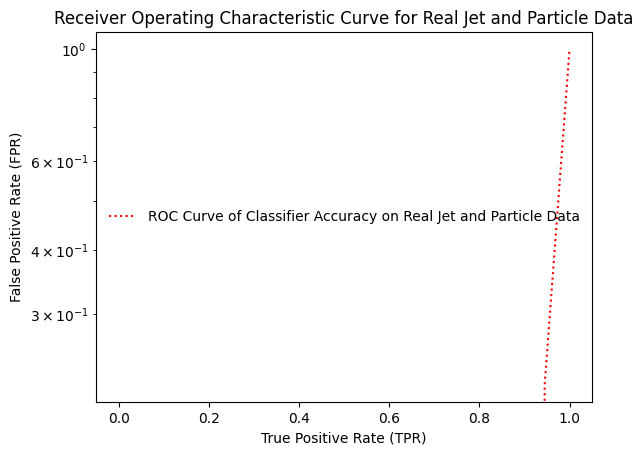

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_xgb, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_features, y_train_real)

# Evaluate the model
accuracy_rf = rf_model.score(X_test_features, y_test_real)
print(f"Test Accuracy with Random Forest: {accuracy_rf}")
predictions_rf = rf_model.predict(X_test_features)

/tmp/ipykernel_1420823/1456624403.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_features, y_train_real)


Test Accuracy with Random Forest: 0.8930036674816626


Classifier AUC: 0.8929951661263539


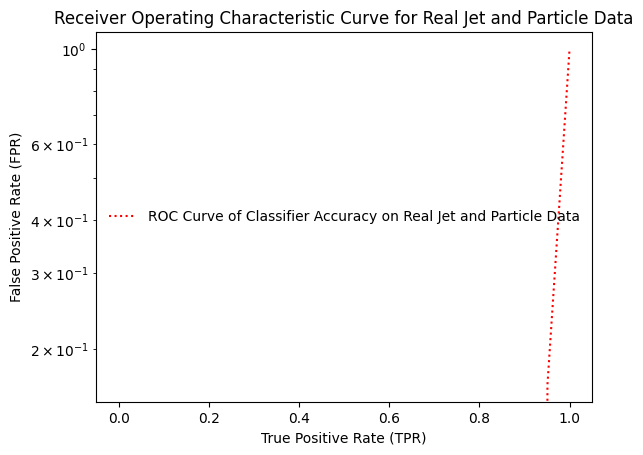

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import utils
fpr_combine_real, tpr_combine_real, _ = roc_curve(y_test_real,predictions_rf, pos_label=1)
print("Classifier AUC: {}".format(auc(fpr_combine_real, tpr_combine_real)))
plt.plot(tpr_combine_real,fpr_combine_real,label="ROC Curve of Classifier Accuracy on Real Jet and Particle Data",
                         color='red',
                         linestyle=utils.line_style['top_tagging_ll'])
plt.ylabel('False Positive Rate (FPR)')  # X-axis title
plt.xlabel('True Positive Rate (TPR)')  # Y-axis title
plt.title('Receiver Operating Characteristic Curve for Real Jet and Particle Data')  # Plot title
plt.yscale('log')
plt.legend(frameon=False,fontsize=10)
plt.show()